In [1]:
import numerox as nx

folder = "numerai_datasets"
 
nx.data.TRAIN_FILE = '%s/numerai_training_data.csv' % folder
nx.data.TOURNAMENT_FILE = '%s/numerai_tournament_data.csv' % folder
 
data = nx.download('nr.zip')

nr.zip: 160MB [00:09, 17.5MB/s]                                                                                                                      


In [56]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split

In [50]:
from pipe import *

eras = set(data.era) | as_list 

era_data = eras    \
        | select( lambda e: np.logical_and( data.region=='train', data.era==e ) ) \
        | select( lambda e: ( data.x[ e ], data.y[3][e] ) ) \
        | where( lambda e: e[0].shape[0] > 0 ) \
        | select( lambda e: train_test_split( e[0], e[1], test_size=0.33  ) ) \
        | as_list()

In [77]:
eras = list( data.era[data.region=='train'] ) | select( lambda e: int( e.replace('era','') ) ) | as_list

from keras.utils import to_categorical

eras_y = to_categorical(eras)

First build the era-predicting model

In [132]:
import matplotlib.pyplot as plt

def plot(history, val=True, train=True, title='Bernie', metric='loss'):
    if train:
        plt.plot(history.history[metric][2:])
    if val:
        plt.plot(history.history['val_%s' % (metric) ][2:])
        
    plt.title('model %s on %s!' %(metric, title))
    plt.ylabel(metric)
    plt.xlabel('epoch')
    
    labels = []
    if train: 
        labels.append('train')
    if val: 
        labels.append('validation')
        
    plt.legend(labels, loc='upper left')
    plt.show()

Train on 251366 samples, validate on 251366 samples
Epoch 1/500
251366/251366 [==============================] - ETA: 27s - loss: 4.7976 - categorical_crossentropy: 4.7976 - acc: 0.009 - ETA: 6s - loss: 4.7968 - categorical_crossentropy: 4.7968 - acc: 0.008 - ETA: 3s - loss: 4.7960 - categorical_crossentropy: 4.7960 - acc: 0.00 - ETA: 1s - loss: 4.7953 - categorical_crossentropy: 4.7953 - acc: 0.00 - ETA: 1s - loss: 4.7947 - categorical_crossentropy: 4.7947 - acc: 0.00 - ETA: 0s - loss: 4.7941 - categorical_crossentropy: 4.7941 - acc: 0.00 - ETA: 0s - loss: 4.7935 - categorical_crossentropy: 4.7935 - acc: 0.00 - ETA: 0s - loss: 4.7931 - categorical_crossentropy: 4.7931 - acc: 0.00 - ETA: 0s - loss: 4.7925 - categorical_crossentropy: 4.7925 - acc: 0.00 - 2s 8us/step - loss: 4.7925 - categorical_crossentropy: 4.7925 - acc: 0.0091 - val_loss: 4.7862 - val_categorical_crossentropy: 4.7862 - val_acc: 0.0099
Epoch 2/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7896 

251366/251366 [==============================] - ETA: 0s - loss: 4.7808 - categorical_crossentropy: 4.7808 - acc: 0.00 - ETA: 0s - loss: 4.7800 - categorical_crossentropy: 4.7800 - acc: 0.00 - ETA: 0s - loss: 4.7799 - categorical_crossentropy: 4.7799 - acc: 0.01 - ETA: 0s - loss: 4.7798 - categorical_crossentropy: 4.7798 - acc: 0.01 - ETA: 0s - loss: 4.7799 - categorical_crossentropy: 4.7799 - acc: 0.01 - ETA: 0s - loss: 4.7798 - categorical_crossentropy: 4.7798 - acc: 0.00 - ETA: 0s - loss: 4.7800 - categorical_crossentropy: 4.7800 - acc: 0.00 - ETA: 0s - loss: 4.7801 - categorical_crossentropy: 4.7801 - acc: 0.00 - ETA: 0s - loss: 4.7802 - categorical_crossentropy: 4.7802 - acc: 0.00 - 1s 3us/step - loss: 4.7802 - categorical_crossentropy: 4.7802 - acc: 0.0098 - val_loss: 4.7790 - val_categorical_crossentropy: 4.7790 - val_acc: 0.0097
Epoch 11/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7791 - categorical_crossentropy: 4.7791 - acc: 0.00 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7752 - categorical_crossentropy: 4.7752 - acc: 0.01 - ETA: 0s - loss: 4.7764 - categorical_crossentropy: 4.7764 - acc: 0.00 - ETA: 0s - loss: 4.7769 - categorical_crossentropy: 4.7769 - acc: 0.00 - ETA: 0s - loss: 4.7769 - categorical_crossentropy: 4.7769 - acc: 0.01 - ETA: 0s - loss: 4.7767 - categorical_crossentropy: 4.7767 - acc: 0.00 - ETA: 0s - loss: 4.7764 - categorical_crossentropy: 4.7764 - acc: 0.01 - ETA: 0s - loss: 4.7763 - categorical_crossentropy: 4.7763 - acc: 0.01 - ETA: 0s - loss: 4.7762 - categorical_crossentropy: 4.7762 - acc: 0.01 - ETA: 0s - loss: 4.7763 - categorical_crossentropy: 4.7763 - acc: 0.00 - 1s 3us/step - loss: 4.7763 - categorical_crossentropy: 4.7763 - acc: 0.0099 - val_loss: 4.7757 - val_categorical_crossentropy: 4.7757 - val_acc: 0.0101
Epoch 20/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7767 - categorical_crossentropy: 4.7767 - acc: 0.01 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7714 - categorical_crossentropy: 4.7714 - acc: 0.00 - ETA: 0s - loss: 4.7707 - categorical_crossentropy: 4.7707 - acc: 0.01 - ETA: 0s - loss: 4.7703 - categorical_crossentropy: 4.7703 - acc: 0.01 - ETA: 0s - loss: 4.7703 - categorical_crossentropy: 4.7703 - acc: 0.01 - ETA: 0s - loss: 4.7703 - categorical_crossentropy: 4.7703 - acc: 0.01 - ETA: 0s - loss: 4.7705 - categorical_crossentropy: 4.7705 - acc: 0.01 - ETA: 0s - loss: 4.7704 - categorical_crossentropy: 4.7704 - acc: 0.01 - ETA: 0s - loss: 4.7703 - categorical_crossentropy: 4.7703 - acc: 0.01 - ETA: 0s - loss: 4.7703 - categorical_crossentropy: 4.7703 - acc: 0.01 - 1s 3us/step - loss: 4.7703 - categorical_crossentropy: 4.7703 - acc: 0.0107 - val_loss: 4.7674 - val_categorical_crossentropy: 4.7674 - val_acc: 0.0107
Epoch 29/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7686 - categorical_crossentropy: 4.7686 - acc: 0.01 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7656 - categorical_crossentropy: 4.7656 - acc: 0.01 - ETA: 0s - loss: 4.7663 - categorical_crossentropy: 4.7663 - acc: 0.01 - ETA: 0s - loss: 4.7668 - categorical_crossentropy: 4.7668 - acc: 0.01 - ETA: 0s - loss: 4.7671 - categorical_crossentropy: 4.7671 - acc: 0.01 - ETA: 0s - loss: 4.7673 - categorical_crossentropy: 4.7673 - acc: 0.01 - ETA: 0s - loss: 4.7671 - categorical_crossentropy: 4.7671 - acc: 0.01 - ETA: 0s - loss: 4.7671 - categorical_crossentropy: 4.7671 - acc: 0.01 - ETA: 0s - loss: 4.7669 - categorical_crossentropy: 4.7669 - acc: 0.01 - ETA: 0s - loss: 4.7668 - categorical_crossentropy: 4.7668 - acc: 0.01 - 1s 3us/step - loss: 4.7668 - categorical_crossentropy: 4.7668 - acc: 0.0111 - val_loss: 4.7646 - val_categorical_crossentropy: 4.7646 - val_acc: 0.0113
Epoch 38/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7631 - categorical_crossentropy: 4.7631 - acc: 0.01 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7635 - categorical_crossentropy: 4.7635 - acc: 0.01 - ETA: 0s - loss: 4.7642 - categorical_crossentropy: 4.7642 - acc: 0.01 - ETA: 0s - loss: 4.7645 - categorical_crossentropy: 4.7645 - acc: 0.01 - ETA: 0s - loss: 4.7648 - categorical_crossentropy: 4.7648 - acc: 0.01 - ETA: 0s - loss: 4.7647 - categorical_crossentropy: 4.7647 - acc: 0.01 - ETA: 0s - loss: 4.7648 - categorical_crossentropy: 4.7648 - acc: 0.01 - ETA: 0s - loss: 4.7649 - categorical_crossentropy: 4.7649 - acc: 0.01 - ETA: 0s - loss: 4.7650 - categorical_crossentropy: 4.7650 - acc: 0.01 - ETA: 0s - loss: 4.7649 - categorical_crossentropy: 4.7649 - acc: 0.01 - 1s 3us/step - loss: 4.7649 - categorical_crossentropy: 4.7649 - acc: 0.0110 - val_loss: 4.7629 - val_categorical_crossentropy: 4.7629 - val_acc: 0.0111
Epoch 47/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7659 - categorical_crossentropy: 4.7659 - acc: 0.01 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7611 - categorical_crossentropy: 4.7611 - acc: 0.01 - ETA: 0s - loss: 4.7612 - categorical_crossentropy: 4.7612 - acc: 0.01 - ETA: 0s - loss: 4.7612 - categorical_crossentropy: 4.7612 - acc: 0.01 - ETA: 0s - loss: 4.7623 - categorical_crossentropy: 4.7623 - acc: 0.01 - ETA: 0s - loss: 4.7618 - categorical_crossentropy: 4.7618 - acc: 0.01 - ETA: 0s - loss: 4.7620 - categorical_crossentropy: 4.7620 - acc: 0.01 - ETA: 0s - loss: 4.7618 - categorical_crossentropy: 4.7618 - acc: 0.01 - ETA: 0s - loss: 4.7618 - categorical_crossentropy: 4.7618 - acc: 0.01 - ETA: 0s - loss: 4.7616 - categorical_crossentropy: 4.7616 - acc: 0.01 - 1s 3us/step - loss: 4.7615 - categorical_crossentropy: 4.7615 - acc: 0.0117 - val_loss: 4.7597 - val_categorical_crossentropy: 4.7597 - val_acc: 0.0116
Epoch 56/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7579 - categorical_crossentropy: 4.7579 - acc: 0.01 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7585 - categorical_crossentropy: 4.7585 - acc: 0.01 - ETA: 0s - loss: 4.7586 - categorical_crossentropy: 4.7586 - acc: 0.01 - ETA: 0s - loss: 4.7595 - categorical_crossentropy: 4.7595 - acc: 0.01 - ETA: 0s - loss: 4.7598 - categorical_crossentropy: 4.7598 - acc: 0.01 - ETA: 0s - loss: 4.7605 - categorical_crossentropy: 4.7605 - acc: 0.01 - ETA: 0s - loss: 4.7604 - categorical_crossentropy: 4.7604 - acc: 0.01 - ETA: 0s - loss: 4.7603 - categorical_crossentropy: 4.7603 - acc: 0.01 - ETA: 0s - loss: 4.7601 - categorical_crossentropy: 4.7601 - acc: 0.01 - ETA: 0s - loss: 4.7603 - categorical_crossentropy: 4.7603 - acc: 0.01 - 1s 3us/step - loss: 4.7603 - categorical_crossentropy: 4.7603 - acc: 0.0122 - val_loss: 4.7582 - val_categorical_crossentropy: 4.7582 - val_acc: 0.0121
Epoch 65/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7602 - categorical_crossentropy: 4.7602 - acc: 0.01 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7577 - categorical_crossentropy: 4.7577 - acc: 0.01 - ETA: 0s - loss: 4.7571 - categorical_crossentropy: 4.7571 - acc: 0.01 - ETA: 0s - loss: 4.7570 - categorical_crossentropy: 4.7570 - acc: 0.01 - ETA: 0s - loss: 4.7577 - categorical_crossentropy: 4.7577 - acc: 0.01 - ETA: 0s - loss: 4.7576 - categorical_crossentropy: 4.7576 - acc: 0.01 - ETA: 0s - loss: 4.7576 - categorical_crossentropy: 4.7576 - acc: 0.01 - ETA: 0s - loss: 4.7575 - categorical_crossentropy: 4.7575 - acc: 0.01 - ETA: 0s - loss: 4.7578 - categorical_crossentropy: 4.7578 - acc: 0.01 - ETA: 0s - loss: 4.7577 - categorical_crossentropy: 4.7577 - acc: 0.01 - 1s 3us/step - loss: 4.7577 - categorical_crossentropy: 4.7577 - acc: 0.0117 - val_loss: 4.7559 - val_categorical_crossentropy: 4.7559 - val_acc: 0.0121
Epoch 74/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7558 - categorical_crossentropy: 4.7558 - acc: 0.01 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7523 - categorical_crossentropy: 4.7523 - acc: 0.01 - ETA: 0s - loss: 4.7549 - categorical_crossentropy: 4.7549 - acc: 0.01 - ETA: 0s - loss: 4.7554 - categorical_crossentropy: 4.7554 - acc: 0.01 - ETA: 0s - loss: 4.7553 - categorical_crossentropy: 4.7553 - acc: 0.01 - ETA: 0s - loss: 4.7559 - categorical_crossentropy: 4.7559 - acc: 0.01 - ETA: 0s - loss: 4.7560 - categorical_crossentropy: 4.7560 - acc: 0.01 - ETA: 0s - loss: 4.7565 - categorical_crossentropy: 4.7565 - acc: 0.01 - ETA: 0s - loss: 4.7565 - categorical_crossentropy: 4.7565 - acc: 0.01 - ETA: 0s - loss: 4.7566 - categorical_crossentropy: 4.7566 - acc: 0.01 - 1s 3us/step - loss: 4.7565 - categorical_crossentropy: 4.7565 - acc: 0.0126 - val_loss: 4.7539 - val_categorical_crossentropy: 4.7539 - val_acc: 0.0124
Epoch 83/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7547 - categorical_crossentropy: 4.7547 - acc: 0.01 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7528 - categorical_crossentropy: 4.7528 - acc: 0.01 - ETA: 0s - loss: 4.7560 - categorical_crossentropy: 4.7560 - acc: 0.01 - ETA: 0s - loss: 4.7548 - categorical_crossentropy: 4.7548 - acc: 0.01 - ETA: 0s - loss: 4.7544 - categorical_crossentropy: 4.7544 - acc: 0.01 - ETA: 0s - loss: 4.7540 - categorical_crossentropy: 4.7540 - acc: 0.01 - ETA: 0s - loss: 4.7543 - categorical_crossentropy: 4.7543 - acc: 0.01 - ETA: 0s - loss: 4.7542 - categorical_crossentropy: 4.7542 - acc: 0.01 - ETA: 0s - loss: 4.7542 - categorical_crossentropy: 4.7542 - acc: 0.01 - ETA: 0s - loss: 4.7543 - categorical_crossentropy: 4.7543 - acc: 0.01 - 1s 3us/step - loss: 4.7543 - categorical_crossentropy: 4.7543 - acc: 0.0124 - val_loss: 4.7515 - val_categorical_crossentropy: 4.7515 - val_acc: 0.0126
Epoch 92/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7578 - categorical_crossentropy: 4.7578 - acc: 0.01 - ETA: 0s - loss: 4

251366/251366 [==============================] - ETA: 0s - loss: 4.7550 - categorical_crossentropy: 4.7550 - acc: 0.01 - ETA: 0s - loss: 4.7525 - categorical_crossentropy: 4.7525 - acc: 0.01 - ETA: 0s - loss: 4.7527 - categorical_crossentropy: 4.7527 - acc: 0.01 - ETA: 0s - loss: 4.7525 - categorical_crossentropy: 4.7525 - acc: 0.01 - ETA: 0s - loss: 4.7521 - categorical_crossentropy: 4.7521 - acc: 0.01 - ETA: 0s - loss: 4.7523 - categorical_crossentropy: 4.7523 - acc: 0.01 - ETA: 0s - loss: 4.7524 - categorical_crossentropy: 4.7524 - acc: 0.01 - ETA: 0s - loss: 4.7525 - categorical_crossentropy: 4.7525 - acc: 0.01 - ETA: 0s - loss: 4.7525 - categorical_crossentropy: 4.7525 - acc: 0.01 - 1s 3us/step - loss: 4.7525 - categorical_crossentropy: 4.7525 - acc: 0.0124 - val_loss: 4.7512 - val_categorical_crossentropy: 4.7512 - val_acc: 0.0128
Epoch 101/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7498 - categorical_crossentropy: 4.7498 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7496 - categorical_crossentropy: 4.7496 - acc: 0.01 - ETA: 0s - loss: 4.7491 - categorical_crossentropy: 4.7491 - acc: 0.01 - ETA: 0s - loss: 4.7507 - categorical_crossentropy: 4.7507 - acc: 0.01 - ETA: 0s - loss: 4.7512 - categorical_crossentropy: 4.7512 - acc: 0.01 - ETA: 0s - loss: 4.7514 - categorical_crossentropy: 4.7514 - acc: 0.01 - ETA: 0s - loss: 4.7510 - categorical_crossentropy: 4.7510 - acc: 0.01 - ETA: 0s - loss: 4.7510 - categorical_crossentropy: 4.7510 - acc: 0.01 - ETA: 0s - loss: 4.7511 - categorical_crossentropy: 4.7511 - acc: 0.01 - ETA: 0s - loss: 4.7509 - categorical_crossentropy: 4.7509 - acc: 0.01 - 1s 3us/step - loss: 4.7509 - categorical_crossentropy: 4.7509 - acc: 0.0130 - val_loss: 4.7493 - val_categorical_crossentropy: 4.7493 - val_acc: 0.0127
Epoch 110/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7508 - categorical_crossentropy: 4.7508 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7470 - categorical_crossentropy: 4.7470 - acc: 0.01 - ETA: 0s - loss: 4.7476 - categorical_crossentropy: 4.7476 - acc: 0.01 - ETA: 0s - loss: 4.7476 - categorical_crossentropy: 4.7476 - acc: 0.01 - ETA: 0s - loss: 4.7485 - categorical_crossentropy: 4.7485 - acc: 0.01 - ETA: 0s - loss: 4.7494 - categorical_crossentropy: 4.7494 - acc: 0.01 - ETA: 0s - loss: 4.7501 - categorical_crossentropy: 4.7501 - acc: 0.01 - ETA: 0s - loss: 4.7501 - categorical_crossentropy: 4.7501 - acc: 0.01 - ETA: 0s - loss: 4.7499 - categorical_crossentropy: 4.7499 - acc: 0.01 - ETA: 0s - loss: 4.7496 - categorical_crossentropy: 4.7496 - acc: 0.01 - 1s 3us/step - loss: 4.7495 - categorical_crossentropy: 4.7495 - acc: 0.0130 - val_loss: 4.7473 - val_categorical_crossentropy: 4.7473 - val_acc: 0.0133
Epoch 119/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7482 - categorical_crossentropy: 4.7482 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7467 - categorical_crossentropy: 4.7467 - acc: 0.01 - ETA: 0s - loss: 4.7471 - categorical_crossentropy: 4.7471 - acc: 0.01 - ETA: 0s - loss: 4.7478 - categorical_crossentropy: 4.7478 - acc: 0.01 - ETA: 0s - loss: 4.7476 - categorical_crossentropy: 4.7476 - acc: 0.01 - ETA: 0s - loss: 4.7473 - categorical_crossentropy: 4.7473 - acc: 0.01 - ETA: 0s - loss: 4.7472 - categorical_crossentropy: 4.7472 - acc: 0.01 - ETA: 0s - loss: 4.7470 - categorical_crossentropy: 4.7470 - acc: 0.01 - ETA: 0s - loss: 4.7471 - categorical_crossentropy: 4.7471 - acc: 0.01 - ETA: 0s - loss: 4.7471 - categorical_crossentropy: 4.7471 - acc: 0.01 - 1s 3us/step - loss: 4.7471 - categorical_crossentropy: 4.7471 - acc: 0.0135 - val_loss: 4.7456 - val_categorical_crossentropy: 4.7456 - val_acc: 0.0134
Epoch 128/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7436 - categorical_crossentropy: 4.7436 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7443 - categorical_crossentropy: 4.7443 - acc: 0.01 - ETA: 0s - loss: 4.7441 - categorical_crossentropy: 4.7441 - acc: 0.01 - ETA: 0s - loss: 4.7447 - categorical_crossentropy: 4.7447 - acc: 0.01 - ETA: 0s - loss: 4.7446 - categorical_crossentropy: 4.7446 - acc: 0.01 - ETA: 0s - loss: 4.7446 - categorical_crossentropy: 4.7446 - acc: 0.01 - ETA: 0s - loss: 4.7447 - categorical_crossentropy: 4.7447 - acc: 0.01 - ETA: 0s - loss: 4.7456 - categorical_crossentropy: 4.7456 - acc: 0.01 - ETA: 0s - loss: 4.7458 - categorical_crossentropy: 4.7458 - acc: 0.01 - ETA: 0s - loss: 4.7461 - categorical_crossentropy: 4.7461 - acc: 0.01 - 1s 3us/step - loss: 4.7460 - categorical_crossentropy: 4.7460 - acc: 0.0134 - val_loss: 4.7460 - val_categorical_crossentropy: 4.7460 - val_acc: 0.0133
Epoch 137/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7428 - categorical_crossentropy: 4.7428 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7463 - categorical_crossentropy: 4.7463 - acc: 0.01 - ETA: 0s - loss: 4.7441 - categorical_crossentropy: 4.7441 - acc: 0.01 - ETA: 0s - loss: 4.7441 - categorical_crossentropy: 4.7441 - acc: 0.01 - ETA: 0s - loss: 4.7448 - categorical_crossentropy: 4.7448 - acc: 0.01 - ETA: 0s - loss: 4.7450 - categorical_crossentropy: 4.7450 - acc: 0.01 - ETA: 0s - loss: 4.7446 - categorical_crossentropy: 4.7446 - acc: 0.01 - ETA: 0s - loss: 4.7446 - categorical_crossentropy: 4.7446 - acc: 0.01 - ETA: 0s - loss: 4.7448 - categorical_crossentropy: 4.7448 - acc: 0.01 - ETA: 0s - loss: 4.7447 - categorical_crossentropy: 4.7447 - acc: 0.01 - 1s 3us/step - loss: 4.7447 - categorical_crossentropy: 4.7447 - acc: 0.0137 - val_loss: 4.7442 - val_categorical_crossentropy: 4.7442 - val_acc: 0.0136
Epoch 146/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7437 - categorical_crossentropy: 4.7437 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7469 - categorical_crossentropy: 4.7469 - acc: 0.01 - ETA: 0s - loss: 4.7427 - categorical_crossentropy: 4.7427 - acc: 0.01 - ETA: 0s - loss: 4.7438 - categorical_crossentropy: 4.7438 - acc: 0.01 - ETA: 0s - loss: 4.7443 - categorical_crossentropy: 4.7443 - acc: 0.01 - ETA: 0s - loss: 4.7440 - categorical_crossentropy: 4.7440 - acc: 0.01 - ETA: 0s - loss: 4.7430 - categorical_crossentropy: 4.7430 - acc: 0.01 - ETA: 0s - loss: 4.7436 - categorical_crossentropy: 4.7436 - acc: 0.01 - ETA: 0s - loss: 4.7437 - categorical_crossentropy: 4.7437 - acc: 0.01 - ETA: 0s - loss: 4.7443 - categorical_crossentropy: 4.7443 - acc: 0.01 - 1s 3us/step - loss: 4.7442 - categorical_crossentropy: 4.7442 - acc: 0.0137 - val_loss: 4.7457 - val_categorical_crossentropy: 4.7457 - val_acc: 0.0133
Epoch 155/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7419 - categorical_crossentropy: 4.7419 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7380 - categorical_crossentropy: 4.7380 - acc: 0.01 - ETA: 0s - loss: 4.7434 - categorical_crossentropy: 4.7434 - acc: 0.01 - ETA: 0s - loss: 4.7422 - categorical_crossentropy: 4.7422 - acc: 0.01 - ETA: 0s - loss: 4.7426 - categorical_crossentropy: 4.7426 - acc: 0.01 - ETA: 0s - loss: 4.7430 - categorical_crossentropy: 4.7430 - acc: 0.01 - ETA: 0s - loss: 4.7424 - categorical_crossentropy: 4.7424 - acc: 0.01 - ETA: 0s - loss: 4.7425 - categorical_crossentropy: 4.7425 - acc: 0.01 - ETA: 0s - loss: 4.7424 - categorical_crossentropy: 4.7424 - acc: 0.01 - ETA: 0s - loss: 4.7427 - categorical_crossentropy: 4.7427 - acc: 0.01 - 1s 3us/step - loss: 4.7427 - categorical_crossentropy: 4.7427 - acc: 0.0137 - val_loss: 4.7442 - val_categorical_crossentropy: 4.7442 - val_acc: 0.0130
Epoch 164/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7393 - categorical_crossentropy: 4.7393 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7435 - categorical_crossentropy: 4.7435 - acc: 0.01 - ETA: 0s - loss: 4.7423 - categorical_crossentropy: 4.7423 - acc: 0.01 - ETA: 0s - loss: 4.7415 - categorical_crossentropy: 4.7415 - acc: 0.01 - ETA: 0s - loss: 4.7417 - categorical_crossentropy: 4.7417 - acc: 0.01 - ETA: 0s - loss: 4.7417 - categorical_crossentropy: 4.7417 - acc: 0.01 - ETA: 0s - loss: 4.7417 - categorical_crossentropy: 4.7417 - acc: 0.01 - ETA: 0s - loss: 4.7417 - categorical_crossentropy: 4.7417 - acc: 0.01 - ETA: 0s - loss: 4.7416 - categorical_crossentropy: 4.7416 - acc: 0.01 - ETA: 0s - loss: 4.7417 - categorical_crossentropy: 4.7417 - acc: 0.01 - 1s 3us/step - loss: 4.7417 - categorical_crossentropy: 4.7417 - acc: 0.0137 - val_loss: 4.7430 - val_categorical_crossentropy: 4.7430 - val_acc: 0.0134
Epoch 173/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7437 - categorical_crossentropy: 4.7437 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7434 - categorical_crossentropy: 4.7434 - acc: 0.01 - ETA: 0s - loss: 4.7420 - categorical_crossentropy: 4.7420 - acc: 0.01 - ETA: 0s - loss: 4.7419 - categorical_crossentropy: 4.7419 - acc: 0.01 - ETA: 0s - loss: 4.7417 - categorical_crossentropy: 4.7417 - acc: 0.01 - ETA: 0s - loss: 4.7408 - categorical_crossentropy: 4.7408 - acc: 0.01 - ETA: 0s - loss: 4.7410 - categorical_crossentropy: 4.7410 - acc: 0.01 - ETA: 0s - loss: 4.7408 - categorical_crossentropy: 4.7408 - acc: 0.01 - ETA: 0s - loss: 4.7406 - categorical_crossentropy: 4.7406 - acc: 0.01 - ETA: 0s - loss: 4.7403 - categorical_crossentropy: 4.7403 - acc: 0.01 - 1s 3us/step - loss: 4.7402 - categorical_crossentropy: 4.7402 - acc: 0.0140 - val_loss: 4.7396 - val_categorical_crossentropy: 4.7396 - val_acc: 0.0138
Epoch 182/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7398 - categorical_crossentropy: 4.7398 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7403 - categorical_crossentropy: 4.7403 - acc: 0.01 - ETA: 0s - loss: 4.7384 - categorical_crossentropy: 4.7384 - acc: 0.01 - ETA: 0s - loss: 4.7396 - categorical_crossentropy: 4.7396 - acc: 0.01 - ETA: 0s - loss: 4.7397 - categorical_crossentropy: 4.7397 - acc: 0.01 - ETA: 0s - loss: 4.7392 - categorical_crossentropy: 4.7392 - acc: 0.01 - ETA: 0s - loss: 4.7392 - categorical_crossentropy: 4.7392 - acc: 0.01 - ETA: 0s - loss: 4.7389 - categorical_crossentropy: 4.7389 - acc: 0.01 - ETA: 0s - loss: 4.7392 - categorical_crossentropy: 4.7392 - acc: 0.01 - ETA: 0s - loss: 4.7394 - categorical_crossentropy: 4.7394 - acc: 0.01 - 1s 3us/step - loss: 4.7395 - categorical_crossentropy: 4.7395 - acc: 0.0143 - val_loss: 4.7409 - val_categorical_crossentropy: 4.7409 - val_acc: 0.0134
Epoch 191/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7362 - categorical_crossentropy: 4.7362 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7426 - categorical_crossentropy: 4.7426 - acc: 0.01 - ETA: 0s - loss: 4.7410 - categorical_crossentropy: 4.7410 - acc: 0.01 - ETA: 0s - loss: 4.7408 - categorical_crossentropy: 4.7408 - acc: 0.01 - ETA: 0s - loss: 4.7394 - categorical_crossentropy: 4.7394 - acc: 0.01 - ETA: 0s - loss: 4.7396 - categorical_crossentropy: 4.7396 - acc: 0.01 - ETA: 0s - loss: 4.7391 - categorical_crossentropy: 4.7391 - acc: 0.01 - ETA: 0s - loss: 4.7390 - categorical_crossentropy: 4.7390 - acc: 0.01 - ETA: 0s - loss: 4.7388 - categorical_crossentropy: 4.7388 - acc: 0.01 - ETA: 0s - loss: 4.7388 - categorical_crossentropy: 4.7388 - acc: 0.01 - 1s 3us/step - loss: 4.7387 - categorical_crossentropy: 4.7387 - acc: 0.0141 - val_loss: 4.7412 - val_categorical_crossentropy: 4.7412 - val_acc: 0.0133
Epoch 200/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7353 - categorical_crossentropy: 4.7353 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7380 - categorical_crossentropy: 4.7380 - acc: 0.01 - ETA: 0s - loss: 4.7390 - categorical_crossentropy: 4.7390 - acc: 0.01 - ETA: 0s - loss: 4.7371 - categorical_crossentropy: 4.7371 - acc: 0.01 - ETA: 0s - loss: 4.7373 - categorical_crossentropy: 4.7373 - acc: 0.01 - ETA: 0s - loss: 4.7373 - categorical_crossentropy: 4.7373 - acc: 0.01 - ETA: 0s - loss: 4.7375 - categorical_crossentropy: 4.7375 - acc: 0.01 - ETA: 0s - loss: 4.7379 - categorical_crossentropy: 4.7379 - acc: 0.01 - ETA: 0s - loss: 4.7379 - categorical_crossentropy: 4.7379 - acc: 0.01 - ETA: 0s - loss: 4.7375 - categorical_crossentropy: 4.7375 - acc: 0.01 - 1s 3us/step - loss: 4.7376 - categorical_crossentropy: 4.7376 - acc: 0.0140 - val_loss: 4.7392 - val_categorical_crossentropy: 4.7392 - val_acc: 0.0134
Epoch 209/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7355 - categorical_crossentropy: 4.7355 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7369 - categorical_crossentropy: 4.7369 - acc: 0.01 - ETA: 0s - loss: 4.7371 - categorical_crossentropy: 4.7371 - acc: 0.01 - ETA: 0s - loss: 4.7357 - categorical_crossentropy: 4.7357 - acc: 0.01 - ETA: 0s - loss: 4.7358 - categorical_crossentropy: 4.7358 - acc: 0.01 - ETA: 0s - loss: 4.7359 - categorical_crossentropy: 4.7359 - acc: 0.01 - ETA: 0s - loss: 4.7357 - categorical_crossentropy: 4.7357 - acc: 0.01 - ETA: 0s - loss: 4.7359 - categorical_crossentropy: 4.7359 - acc: 0.01 - ETA: 0s - loss: 4.7365 - categorical_crossentropy: 4.7365 - acc: 0.01 - ETA: 0s - loss: 4.7364 - categorical_crossentropy: 4.7364 - acc: 0.01 - 1s 3us/step - loss: 4.7365 - categorical_crossentropy: 4.7365 - acc: 0.0144 - val_loss: 4.7400 - val_categorical_crossentropy: 4.7400 - val_acc: 0.0139
Epoch 218/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7385 - categorical_crossentropy: 4.7385 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7348 - categorical_crossentropy: 4.7348 - acc: 0.01 - ETA: 0s - loss: 4.7353 - categorical_crossentropy: 4.7353 - acc: 0.01 - ETA: 0s - loss: 4.7365 - categorical_crossentropy: 4.7365 - acc: 0.01 - ETA: 0s - loss: 4.7355 - categorical_crossentropy: 4.7355 - acc: 0.01 - ETA: 0s - loss: 4.7359 - categorical_crossentropy: 4.7359 - acc: 0.01 - ETA: 0s - loss: 4.7361 - categorical_crossentropy: 4.7361 - acc: 0.01 - ETA: 0s - loss: 4.7362 - categorical_crossentropy: 4.7362 - acc: 0.01 - ETA: 0s - loss: 4.7358 - categorical_crossentropy: 4.7358 - acc: 0.01 - ETA: 0s - loss: 4.7358 - categorical_crossentropy: 4.7358 - acc: 0.01 - 1s 3us/step - loss: 4.7358 - categorical_crossentropy: 4.7358 - acc: 0.0147 - val_loss: 4.7387 - val_categorical_crossentropy: 4.7387 - val_acc: 0.0139
Epoch 227/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7366 - categorical_crossentropy: 4.7366 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7331 - categorical_crossentropy: 4.7331 - acc: 0.01 - ETA: 0s - loss: 4.7351 - categorical_crossentropy: 4.7351 - acc: 0.01 - ETA: 0s - loss: 4.7340 - categorical_crossentropy: 4.7340 - acc: 0.01 - ETA: 0s - loss: 4.7341 - categorical_crossentropy: 4.7341 - acc: 0.01 - ETA: 0s - loss: 4.7345 - categorical_crossentropy: 4.7345 - acc: 0.01 - ETA: 0s - loss: 4.7345 - categorical_crossentropy: 4.7345 - acc: 0.01 - ETA: 0s - loss: 4.7351 - categorical_crossentropy: 4.7351 - acc: 0.01 - ETA: 0s - loss: 4.7345 - categorical_crossentropy: 4.7345 - acc: 0.01 - ETA: 0s - loss: 4.7349 - categorical_crossentropy: 4.7349 - acc: 0.01 - 1s 3us/step - loss: 4.7349 - categorical_crossentropy: 4.7349 - acc: 0.0145 - val_loss: 4.7383 - val_categorical_crossentropy: 4.7383 - val_acc: 0.0135
Epoch 236/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7423 - categorical_crossentropy: 4.7423 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7335 - categorical_crossentropy: 4.7335 - acc: 0.01 - ETA: 0s - loss: 4.7346 - categorical_crossentropy: 4.7346 - acc: 0.01 - ETA: 0s - loss: 4.7334 - categorical_crossentropy: 4.7334 - acc: 0.01 - ETA: 0s - loss: 4.7337 - categorical_crossentropy: 4.7337 - acc: 0.01 - ETA: 0s - loss: 4.7331 - categorical_crossentropy: 4.7331 - acc: 0.01 - ETA: 0s - loss: 4.7335 - categorical_crossentropy: 4.7335 - acc: 0.01 - ETA: 0s - loss: 4.7337 - categorical_crossentropy: 4.7337 - acc: 0.01 - ETA: 0s - loss: 4.7334 - categorical_crossentropy: 4.7334 - acc: 0.01 - ETA: 0s - loss: 4.7337 - categorical_crossentropy: 4.7337 - acc: 0.01 - 1s 3us/step - loss: 4.7336 - categorical_crossentropy: 4.7336 - acc: 0.0147 - val_loss: 4.7344 - val_categorical_crossentropy: 4.7344 - val_acc: 0.0141
Epoch 245/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7350 - categorical_crossentropy: 4.7350 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7319 - categorical_crossentropy: 4.7319 - acc: 0.01 - ETA: 0s - loss: 4.7340 - categorical_crossentropy: 4.7340 - acc: 0.01 - ETA: 0s - loss: 4.7324 - categorical_crossentropy: 4.7324 - acc: 0.01 - ETA: 0s - loss: 4.7329 - categorical_crossentropy: 4.7329 - acc: 0.01 - ETA: 0s - loss: 4.7327 - categorical_crossentropy: 4.7327 - acc: 0.01 - ETA: 0s - loss: 4.7330 - categorical_crossentropy: 4.7330 - acc: 0.01 - ETA: 0s - loss: 4.7328 - categorical_crossentropy: 4.7328 - acc: 0.01 - ETA: 0s - loss: 4.7333 - categorical_crossentropy: 4.7333 - acc: 0.01 - ETA: 0s - loss: 4.7330 - categorical_crossentropy: 4.7330 - acc: 0.01 - 1s 3us/step - loss: 4.7330 - categorical_crossentropy: 4.7330 - acc: 0.0147 - val_loss: 4.7377 - val_categorical_crossentropy: 4.7377 - val_acc: 0.0138
Epoch 254/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7319 - categorical_crossentropy: 4.7319 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7313 - categorical_crossentropy: 4.7313 - acc: 0.01 - ETA: 0s - loss: 4.7320 - categorical_crossentropy: 4.7320 - acc: 0.01 - ETA: 0s - loss: 4.7307 - categorical_crossentropy: 4.7307 - acc: 0.01 - ETA: 0s - loss: 4.7315 - categorical_crossentropy: 4.7315 - acc: 0.01 - ETA: 0s - loss: 4.7318 - categorical_crossentropy: 4.7318 - acc: 0.01 - ETA: 0s - loss: 4.7320 - categorical_crossentropy: 4.7320 - acc: 0.01 - ETA: 0s - loss: 4.7322 - categorical_crossentropy: 4.7322 - acc: 0.01 - ETA: 0s - loss: 4.7326 - categorical_crossentropy: 4.7326 - acc: 0.01 - ETA: 0s - loss: 4.7327 - categorical_crossentropy: 4.7327 - acc: 0.01 - 1s 3us/step - loss: 4.7326 - categorical_crossentropy: 4.7326 - acc: 0.0148 - val_loss: 4.7339 - val_categorical_crossentropy: 4.7339 - val_acc: 0.0144
Epoch 263/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7329 - categorical_crossentropy: 4.7329 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7271 - categorical_crossentropy: 4.7271 - acc: 0.01 - ETA: 0s - loss: 4.7304 - categorical_crossentropy: 4.7304 - acc: 0.01 - ETA: 0s - loss: 4.7297 - categorical_crossentropy: 4.7297 - acc: 0.01 - ETA: 0s - loss: 4.7297 - categorical_crossentropy: 4.7297 - acc: 0.01 - ETA: 0s - loss: 4.7297 - categorical_crossentropy: 4.7297 - acc: 0.01 - ETA: 0s - loss: 4.7305 - categorical_crossentropy: 4.7305 - acc: 0.01 - ETA: 0s - loss: 4.7307 - categorical_crossentropy: 4.7307 - acc: 0.01 - ETA: 0s - loss: 4.7306 - categorical_crossentropy: 4.7306 - acc: 0.01 - ETA: 0s - loss: 4.7306 - categorical_crossentropy: 4.7306 - acc: 0.01 - 1s 3us/step - loss: 4.7306 - categorical_crossentropy: 4.7306 - acc: 0.0149 - val_loss: 4.7352 - val_categorical_crossentropy: 4.7352 - val_acc: 0.0141
Epoch 272/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7304 - categorical_crossentropy: 4.7304 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7250 - categorical_crossentropy: 4.7250 - acc: 0.01 - ETA: 0s - loss: 4.7325 - categorical_crossentropy: 4.7325 - acc: 0.01 - ETA: 0s - loss: 4.7319 - categorical_crossentropy: 4.7319 - acc: 0.01 - ETA: 0s - loss: 4.7312 - categorical_crossentropy: 4.7312 - acc: 0.01 - ETA: 0s - loss: 4.7311 - categorical_crossentropy: 4.7311 - acc: 0.01 - ETA: 0s - loss: 4.7311 - categorical_crossentropy: 4.7311 - acc: 0.01 - ETA: 0s - loss: 4.7307 - categorical_crossentropy: 4.7307 - acc: 0.01 - ETA: 0s - loss: 4.7308 - categorical_crossentropy: 4.7308 - acc: 0.01 - ETA: 0s - loss: 4.7303 - categorical_crossentropy: 4.7303 - acc: 0.01 - 1s 3us/step - loss: 4.7303 - categorical_crossentropy: 4.7303 - acc: 0.0151 - val_loss: 4.7330 - val_categorical_crossentropy: 4.7330 - val_acc: 0.0143
Epoch 281/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7326 - categorical_crossentropy: 4.7326 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7267 - categorical_crossentropy: 4.7267 - acc: 0.01 - ETA: 0s - loss: 4.7282 - categorical_crossentropy: 4.7282 - acc: 0.01 - ETA: 0s - loss: 4.7290 - categorical_crossentropy: 4.7290 - acc: 0.01 - ETA: 0s - loss: 4.7293 - categorical_crossentropy: 4.7293 - acc: 0.01 - ETA: 0s - loss: 4.7292 - categorical_crossentropy: 4.7292 - acc: 0.01 - ETA: 0s - loss: 4.7288 - categorical_crossentropy: 4.7288 - acc: 0.01 - ETA: 0s - loss: 4.7289 - categorical_crossentropy: 4.7289 - acc: 0.01 - ETA: 0s - loss: 4.7287 - categorical_crossentropy: 4.7287 - acc: 0.01 - ETA: 0s - loss: 4.7290 - categorical_crossentropy: 4.7290 - acc: 0.01 - 1s 3us/step - loss: 4.7290 - categorical_crossentropy: 4.7290 - acc: 0.0147 - val_loss: 4.7337 - val_categorical_crossentropy: 4.7337 - val_acc: 0.0142
Epoch 290/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7307 - categorical_crossentropy: 4.7307 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7315 - categorical_crossentropy: 4.7315 - acc: 0.01 - ETA: 0s - loss: 4.7313 - categorical_crossentropy: 4.7313 - acc: 0.01 - ETA: 0s - loss: 4.7301 - categorical_crossentropy: 4.7301 - acc: 0.01 - ETA: 0s - loss: 4.7292 - categorical_crossentropy: 4.7292 - acc: 0.01 - ETA: 0s - loss: 4.7283 - categorical_crossentropy: 4.7283 - acc: 0.01 - ETA: 0s - loss: 4.7279 - categorical_crossentropy: 4.7279 - acc: 0.01 - ETA: 0s - loss: 4.7279 - categorical_crossentropy: 4.7279 - acc: 0.01 - ETA: 0s - loss: 4.7282 - categorical_crossentropy: 4.7282 - acc: 0.01 - ETA: 0s - loss: 4.7282 - categorical_crossentropy: 4.7282 - acc: 0.01 - 1s 3us/step - loss: 4.7282 - categorical_crossentropy: 4.7282 - acc: 0.0153 - val_loss: 4.7363 - val_categorical_crossentropy: 4.7363 - val_acc: 0.0137
Epoch 299/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7319 - categorical_crossentropy: 4.7319 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7288 - categorical_crossentropy: 4.7288 - acc: 0.01 - ETA: 0s - loss: 4.7244 - categorical_crossentropy: 4.7244 - acc: 0.01 - ETA: 0s - loss: 4.7257 - categorical_crossentropy: 4.7257 - acc: 0.01 - ETA: 0s - loss: 4.7261 - categorical_crossentropy: 4.7261 - acc: 0.01 - ETA: 0s - loss: 4.7269 - categorical_crossentropy: 4.7269 - acc: 0.01 - ETA: 0s - loss: 4.7270 - categorical_crossentropy: 4.7270 - acc: 0.01 - ETA: 0s - loss: 4.7270 - categorical_crossentropy: 4.7270 - acc: 0.01 - ETA: 0s - loss: 4.7272 - categorical_crossentropy: 4.7272 - acc: 0.01 - ETA: 0s - loss: 4.7275 - categorical_crossentropy: 4.7275 - acc: 0.01 - 1s 3us/step - loss: 4.7276 - categorical_crossentropy: 4.7276 - acc: 0.0151 - val_loss: 4.7346 - val_categorical_crossentropy: 4.7346 - val_acc: 0.0138
Epoch 308/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7341 - categorical_crossentropy: 4.7341 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7232 - categorical_crossentropy: 4.7232 - acc: 0.01 - ETA: 0s - loss: 4.7263 - categorical_crossentropy: 4.7263 - acc: 0.01 - ETA: 0s - loss: 4.7254 - categorical_crossentropy: 4.7254 - acc: 0.01 - ETA: 0s - loss: 4.7259 - categorical_crossentropy: 4.7259 - acc: 0.01 - ETA: 0s - loss: 4.7249 - categorical_crossentropy: 4.7249 - acc: 0.01 - ETA: 0s - loss: 4.7253 - categorical_crossentropy: 4.7253 - acc: 0.01 - ETA: 0s - loss: 4.7256 - categorical_crossentropy: 4.7256 - acc: 0.01 - ETA: 0s - loss: 4.7255 - categorical_crossentropy: 4.7255 - acc: 0.01 - ETA: 0s - loss: 4.7259 - categorical_crossentropy: 4.7259 - acc: 0.01 - 1s 3us/step - loss: 4.7259 - categorical_crossentropy: 4.7259 - acc: 0.0154 - val_loss: 4.7282 - val_categorical_crossentropy: 4.7282 - val_acc: 0.0148
Epoch 317/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7198 - categorical_crossentropy: 4.7198 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7274 - categorical_crossentropy: 4.7274 - acc: 0.01 - ETA: 0s - loss: 4.7241 - categorical_crossentropy: 4.7241 - acc: 0.01 - ETA: 0s - loss: 4.7247 - categorical_crossentropy: 4.7247 - acc: 0.01 - ETA: 0s - loss: 4.7239 - categorical_crossentropy: 4.7239 - acc: 0.01 - ETA: 0s - loss: 4.7249 - categorical_crossentropy: 4.7249 - acc: 0.01 - ETA: 0s - loss: 4.7252 - categorical_crossentropy: 4.7252 - acc: 0.01 - ETA: 0s - loss: 4.7257 - categorical_crossentropy: 4.7257 - acc: 0.01 - ETA: 0s - loss: 4.7260 - categorical_crossentropy: 4.7260 - acc: 0.01 - ETA: 0s - loss: 4.7262 - categorical_crossentropy: 4.7262 - acc: 0.01 - 1s 3us/step - loss: 4.7261 - categorical_crossentropy: 4.7261 - acc: 0.0152 - val_loss: 4.7325 - val_categorical_crossentropy: 4.7325 - val_acc: 0.0144
Epoch 326/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7279 - categorical_crossentropy: 4.7279 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7227 - categorical_crossentropy: 4.7227 - acc: 0.01 - ETA: 0s - loss: 4.7248 - categorical_crossentropy: 4.7248 - acc: 0.01 - ETA: 0s - loss: 4.7236 - categorical_crossentropy: 4.7236 - acc: 0.01 - ETA: 0s - loss: 4.7235 - categorical_crossentropy: 4.7235 - acc: 0.01 - ETA: 0s - loss: 4.7242 - categorical_crossentropy: 4.7242 - acc: 0.01 - ETA: 0s - loss: 4.7241 - categorical_crossentropy: 4.7241 - acc: 0.01 - ETA: 0s - loss: 4.7242 - categorical_crossentropy: 4.7242 - acc: 0.01 - ETA: 0s - loss: 4.7246 - categorical_crossentropy: 4.7246 - acc: 0.01 - ETA: 0s - loss: 4.7253 - categorical_crossentropy: 4.7253 - acc: 0.01 - 1s 3us/step - loss: 4.7253 - categorical_crossentropy: 4.7253 - acc: 0.0154 - val_loss: 4.7318 - val_categorical_crossentropy: 4.7318 - val_acc: 0.0143
Epoch 335/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7279 - categorical_crossentropy: 4.7279 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7216 - categorical_crossentropy: 4.7216 - acc: 0.01 - ETA: 0s - loss: 4.7201 - categorical_crossentropy: 4.7201 - acc: 0.01 - ETA: 0s - loss: 4.7226 - categorical_crossentropy: 4.7226 - acc: 0.01 - ETA: 0s - loss: 4.7222 - categorical_crossentropy: 4.7222 - acc: 0.01 - ETA: 0s - loss: 4.7227 - categorical_crossentropy: 4.7227 - acc: 0.01 - ETA: 0s - loss: 4.7235 - categorical_crossentropy: 4.7235 - acc: 0.01 - ETA: 0s - loss: 4.7233 - categorical_crossentropy: 4.7233 - acc: 0.01 - ETA: 0s - loss: 4.7235 - categorical_crossentropy: 4.7235 - acc: 0.01 - ETA: 0s - loss: 4.7240 - categorical_crossentropy: 4.7240 - acc: 0.01 - 1s 3us/step - loss: 4.7241 - categorical_crossentropy: 4.7241 - acc: 0.0154 - val_loss: 4.7298 - val_categorical_crossentropy: 4.7298 - val_acc: 0.0144
Epoch 344/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7207 - categorical_crossentropy: 4.7207 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7184 - categorical_crossentropy: 4.7184 - acc: 0.01 - ETA: 0s - loss: 4.7196 - categorical_crossentropy: 4.7196 - acc: 0.01 - ETA: 0s - loss: 4.7212 - categorical_crossentropy: 4.7212 - acc: 0.01 - ETA: 0s - loss: 4.7219 - categorical_crossentropy: 4.7219 - acc: 0.01 - ETA: 0s - loss: 4.7230 - categorical_crossentropy: 4.7230 - acc: 0.01 - ETA: 0s - loss: 4.7228 - categorical_crossentropy: 4.7228 - acc: 0.01 - ETA: 0s - loss: 4.7228 - categorical_crossentropy: 4.7228 - acc: 0.01 - ETA: 0s - loss: 4.7224 - categorical_crossentropy: 4.7224 - acc: 0.01 - ETA: 0s - loss: 4.7227 - categorical_crossentropy: 4.7227 - acc: 0.01 - 1s 3us/step - loss: 4.7227 - categorical_crossentropy: 4.7227 - acc: 0.0153 - val_loss: 4.7291 - val_categorical_crossentropy: 4.7291 - val_acc: 0.0145
Epoch 353/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7271 - categorical_crossentropy: 4.7271 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7252 - categorical_crossentropy: 4.7252 - acc: 0.01 - ETA: 0s - loss: 4.7250 - categorical_crossentropy: 4.7250 - acc: 0.01 - ETA: 0s - loss: 4.7240 - categorical_crossentropy: 4.7240 - acc: 0.01 - ETA: 0s - loss: 4.7242 - categorical_crossentropy: 4.7242 - acc: 0.01 - ETA: 0s - loss: 4.7243 - categorical_crossentropy: 4.7243 - acc: 0.01 - ETA: 0s - loss: 4.7236 - categorical_crossentropy: 4.7236 - acc: 0.01 - ETA: 0s - loss: 4.7232 - categorical_crossentropy: 4.7232 - acc: 0.01 - ETA: 0s - loss: 4.7231 - categorical_crossentropy: 4.7231 - acc: 0.01 - ETA: 0s - loss: 4.7223 - categorical_crossentropy: 4.7223 - acc: 0.01 - 1s 3us/step - loss: 4.7224 - categorical_crossentropy: 4.7224 - acc: 0.0152 - val_loss: 4.7263 - val_categorical_crossentropy: 4.7263 - val_acc: 0.0148
Epoch 362/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7208 - categorical_crossentropy: 4.7208 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7206 - categorical_crossentropy: 4.7206 - acc: 0.01 - ETA: 0s - loss: 4.7213 - categorical_crossentropy: 4.7213 - acc: 0.01 - ETA: 0s - loss: 4.7226 - categorical_crossentropy: 4.7226 - acc: 0.01 - ETA: 0s - loss: 4.7229 - categorical_crossentropy: 4.7229 - acc: 0.01 - ETA: 0s - loss: 4.7226 - categorical_crossentropy: 4.7226 - acc: 0.01 - ETA: 0s - loss: 4.7224 - categorical_crossentropy: 4.7224 - acc: 0.01 - ETA: 0s - loss: 4.7219 - categorical_crossentropy: 4.7219 - acc: 0.01 - ETA: 0s - loss: 4.7216 - categorical_crossentropy: 4.7216 - acc: 0.01 - ETA: 0s - loss: 4.7214 - categorical_crossentropy: 4.7214 - acc: 0.01 - 1s 3us/step - loss: 4.7213 - categorical_crossentropy: 4.7213 - acc: 0.0155 - val_loss: 4.7267 - val_categorical_crossentropy: 4.7267 - val_acc: 0.0148
Epoch 371/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7235 - categorical_crossentropy: 4.7235 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7219 - categorical_crossentropy: 4.7219 - acc: 0.01 - ETA: 0s - loss: 4.7180 - categorical_crossentropy: 4.7180 - acc: 0.01 - ETA: 0s - loss: 4.7184 - categorical_crossentropy: 4.7184 - acc: 0.01 - ETA: 0s - loss: 4.7186 - categorical_crossentropy: 4.7186 - acc: 0.01 - ETA: 0s - loss: 4.7196 - categorical_crossentropy: 4.7196 - acc: 0.01 - ETA: 0s - loss: 4.7198 - categorical_crossentropy: 4.7198 - acc: 0.01 - ETA: 0s - loss: 4.7204 - categorical_crossentropy: 4.7204 - acc: 0.01 - ETA: 0s - loss: 4.7207 - categorical_crossentropy: 4.7207 - acc: 0.01 - ETA: 0s - loss: 4.7206 - categorical_crossentropy: 4.7206 - acc: 0.01 - 1s 3us/step - loss: 4.7205 - categorical_crossentropy: 4.7205 - acc: 0.0156 - val_loss: 4.7334 - val_categorical_crossentropy: 4.7334 - val_acc: 0.0139
Epoch 380/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7224 - categorical_crossentropy: 4.7224 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7189 - categorical_crossentropy: 4.7189 - acc: 0.01 - ETA: 0s - loss: 4.7186 - categorical_crossentropy: 4.7186 - acc: 0.01 - ETA: 0s - loss: 4.7190 - categorical_crossentropy: 4.7190 - acc: 0.01 - ETA: 0s - loss: 4.7188 - categorical_crossentropy: 4.7188 - acc: 0.01 - ETA: 0s - loss: 4.7190 - categorical_crossentropy: 4.7190 - acc: 0.01 - ETA: 0s - loss: 4.7191 - categorical_crossentropy: 4.7191 - acc: 0.01 - ETA: 0s - loss: 4.7192 - categorical_crossentropy: 4.7192 - acc: 0.01 - ETA: 0s - loss: 4.7190 - categorical_crossentropy: 4.7190 - acc: 0.01 - ETA: 0s - loss: 4.7191 - categorical_crossentropy: 4.7191 - acc: 0.01 - 1s 3us/step - loss: 4.7190 - categorical_crossentropy: 4.7190 - acc: 0.0159 - val_loss: 4.7257 - val_categorical_crossentropy: 4.7257 - val_acc: 0.0145
Epoch 389/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7177 - categorical_crossentropy: 4.7177 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7116 - categorical_crossentropy: 4.7116 - acc: 0.01 - ETA: 0s - loss: 4.7154 - categorical_crossentropy: 4.7154 - acc: 0.01 - ETA: 0s - loss: 4.7173 - categorical_crossentropy: 4.7173 - acc: 0.01 - ETA: 0s - loss: 4.7180 - categorical_crossentropy: 4.7180 - acc: 0.01 - ETA: 0s - loss: 4.7180 - categorical_crossentropy: 4.7180 - acc: 0.01 - ETA: 0s - loss: 4.7183 - categorical_crossentropy: 4.7183 - acc: 0.01 - ETA: 0s - loss: 4.7182 - categorical_crossentropy: 4.7182 - acc: 0.01 - ETA: 0s - loss: 4.7180 - categorical_crossentropy: 4.7180 - acc: 0.01 - ETA: 0s - loss: 4.7180 - categorical_crossentropy: 4.7180 - acc: 0.01 - 1s 3us/step - loss: 4.7180 - categorical_crossentropy: 4.7180 - acc: 0.0156 - val_loss: 4.7264 - val_categorical_crossentropy: 4.7264 - val_acc: 0.0142
Epoch 398/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7191 - categorical_crossentropy: 4.7191 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7156 - categorical_crossentropy: 4.7156 - acc: 0.01 - ETA: 0s - loss: 4.7172 - categorical_crossentropy: 4.7172 - acc: 0.01 - ETA: 0s - loss: 4.7169 - categorical_crossentropy: 4.7169 - acc: 0.01 - ETA: 0s - loss: 4.7175 - categorical_crossentropy: 4.7175 - acc: 0.01 - ETA: 0s - loss: 4.7175 - categorical_crossentropy: 4.7175 - acc: 0.01 - ETA: 0s - loss: 4.7173 - categorical_crossentropy: 4.7173 - acc: 0.01 - ETA: 0s - loss: 4.7173 - categorical_crossentropy: 4.7173 - acc: 0.01 - ETA: 0s - loss: 4.7176 - categorical_crossentropy: 4.7176 - acc: 0.01 - ETA: 0s - loss: 4.7171 - categorical_crossentropy: 4.7171 - acc: 0.01 - 1s 3us/step - loss: 4.7171 - categorical_crossentropy: 4.7171 - acc: 0.0159 - val_loss: 4.7256 - val_categorical_crossentropy: 4.7256 - val_acc: 0.0146
Epoch 407/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7101 - categorical_crossentropy: 4.7101 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7119 - categorical_crossentropy: 4.7119 - acc: 0.01 - ETA: 0s - loss: 4.7183 - categorical_crossentropy: 4.7183 - acc: 0.01 - ETA: 0s - loss: 4.7178 - categorical_crossentropy: 4.7178 - acc: 0.01 - ETA: 0s - loss: 4.7177 - categorical_crossentropy: 4.7177 - acc: 0.01 - ETA: 0s - loss: 4.7171 - categorical_crossentropy: 4.7171 - acc: 0.01 - ETA: 0s - loss: 4.7171 - categorical_crossentropy: 4.7171 - acc: 0.01 - ETA: 0s - loss: 4.7168 - categorical_crossentropy: 4.7168 - acc: 0.01 - ETA: 0s - loss: 4.7166 - categorical_crossentropy: 4.7166 - acc: 0.01 - ETA: 0s - loss: 4.7168 - categorical_crossentropy: 4.7168 - acc: 0.01 - 1s 3us/step - loss: 4.7168 - categorical_crossentropy: 4.7168 - acc: 0.0157 - val_loss: 4.7270 - val_categorical_crossentropy: 4.7270 - val_acc: 0.0143
Epoch 416/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7103 - categorical_crossentropy: 4.7103 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7126 - categorical_crossentropy: 4.7126 - acc: 0.01 - ETA: 0s - loss: 4.7163 - categorical_crossentropy: 4.7163 - acc: 0.01 - ETA: 0s - loss: 4.7172 - categorical_crossentropy: 4.7172 - acc: 0.01 - ETA: 0s - loss: 4.7165 - categorical_crossentropy: 4.7165 - acc: 0.01 - ETA: 0s - loss: 4.7158 - categorical_crossentropy: 4.7158 - acc: 0.01 - ETA: 0s - loss: 4.7160 - categorical_crossentropy: 4.7160 - acc: 0.01 - ETA: 0s - loss: 4.7159 - categorical_crossentropy: 4.7159 - acc: 0.01 - ETA: 0s - loss: 4.7156 - categorical_crossentropy: 4.7156 - acc: 0.01 - ETA: 0s - loss: 4.7158 - categorical_crossentropy: 4.7158 - acc: 0.01 - 1s 3us/step - loss: 4.7157 - categorical_crossentropy: 4.7157 - acc: 0.0161 - val_loss: 4.7212 - val_categorical_crossentropy: 4.7212 - val_acc: 0.0144
Epoch 425/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7121 - categorical_crossentropy: 4.7121 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7166 - categorical_crossentropy: 4.7166 - acc: 0.01 - ETA: 0s - loss: 4.7163 - categorical_crossentropy: 4.7163 - acc: 0.01 - ETA: 0s - loss: 4.7169 - categorical_crossentropy: 4.7169 - acc: 0.01 - ETA: 0s - loss: 4.7152 - categorical_crossentropy: 4.7152 - acc: 0.01 - ETA: 0s - loss: 4.7154 - categorical_crossentropy: 4.7154 - acc: 0.01 - ETA: 0s - loss: 4.7149 - categorical_crossentropy: 4.7149 - acc: 0.01 - ETA: 0s - loss: 4.7149 - categorical_crossentropy: 4.7149 - acc: 0.01 - ETA: 0s - loss: 4.7145 - categorical_crossentropy: 4.7145 - acc: 0.01 - ETA: 0s - loss: 4.7144 - categorical_crossentropy: 4.7144 - acc: 0.01 - 1s 3us/step - loss: 4.7145 - categorical_crossentropy: 4.7145 - acc: 0.0160 - val_loss: 4.7219 - val_categorical_crossentropy: 4.7219 - val_acc: 0.0149
Epoch 434/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7201 - categorical_crossentropy: 4.7201 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7061 - categorical_crossentropy: 4.7061 - acc: 0.01 - ETA: 0s - loss: 4.7106 - categorical_crossentropy: 4.7106 - acc: 0.01 - ETA: 0s - loss: 4.7106 - categorical_crossentropy: 4.7106 - acc: 0.01 - ETA: 0s - loss: 4.7111 - categorical_crossentropy: 4.7111 - acc: 0.01 - ETA: 0s - loss: 4.7118 - categorical_crossentropy: 4.7118 - acc: 0.01 - ETA: 0s - loss: 4.7120 - categorical_crossentropy: 4.7120 - acc: 0.01 - ETA: 0s - loss: 4.7120 - categorical_crossentropy: 4.7120 - acc: 0.01 - ETA: 0s - loss: 4.7122 - categorical_crossentropy: 4.7122 - acc: 0.01 - ETA: 0s - loss: 4.7126 - categorical_crossentropy: 4.7126 - acc: 0.01 - 1s 3us/step - loss: 4.7126 - categorical_crossentropy: 4.7126 - acc: 0.0160 - val_loss: 4.7208 - val_categorical_crossentropy: 4.7208 - val_acc: 0.0147
Epoch 443/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7070 - categorical_crossentropy: 4.7070 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7168 - categorical_crossentropy: 4.7168 - acc: 0.01 - ETA: 0s - loss: 4.7131 - categorical_crossentropy: 4.7131 - acc: 0.01 - ETA: 0s - loss: 4.7117 - categorical_crossentropy: 4.7117 - acc: 0.01 - ETA: 0s - loss: 4.7120 - categorical_crossentropy: 4.7120 - acc: 0.01 - ETA: 0s - loss: 4.7119 - categorical_crossentropy: 4.7119 - acc: 0.01 - ETA: 0s - loss: 4.7113 - categorical_crossentropy: 4.7113 - acc: 0.01 - ETA: 0s - loss: 4.7111 - categorical_crossentropy: 4.7111 - acc: 0.01 - ETA: 0s - loss: 4.7116 - categorical_crossentropy: 4.7116 - acc: 0.01 - ETA: 0s - loss: 4.7116 - categorical_crossentropy: 4.7116 - acc: 0.01 - 1s 3us/step - loss: 4.7115 - categorical_crossentropy: 4.7115 - acc: 0.0161 - val_loss: 4.7133 - val_categorical_crossentropy: 4.7133 - val_acc: 0.0157
Epoch 452/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7117 - categorical_crossentropy: 4.7117 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7112 - categorical_crossentropy: 4.7112 - acc: 0.01 - ETA: 0s - loss: 4.7119 - categorical_crossentropy: 4.7119 - acc: 0.01 - ETA: 0s - loss: 4.7119 - categorical_crossentropy: 4.7119 - acc: 0.01 - ETA: 0s - loss: 4.7112 - categorical_crossentropy: 4.7112 - acc: 0.01 - ETA: 0s - loss: 4.7106 - categorical_crossentropy: 4.7106 - acc: 0.01 - ETA: 0s - loss: 4.7096 - categorical_crossentropy: 4.7096 - acc: 0.01 - ETA: 0s - loss: 4.7099 - categorical_crossentropy: 4.7099 - acc: 0.01 - ETA: 0s - loss: 4.7100 - categorical_crossentropy: 4.7100 - acc: 0.01 - ETA: 0s - loss: 4.7101 - categorical_crossentropy: 4.7101 - acc: 0.01 - 1s 3us/step - loss: 4.7102 - categorical_crossentropy: 4.7102 - acc: 0.0160 - val_loss: 4.7175 - val_categorical_crossentropy: 4.7175 - val_acc: 0.0153
Epoch 461/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7153 - categorical_crossentropy: 4.7153 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7150 - categorical_crossentropy: 4.7150 - acc: 0.01 - ETA: 0s - loss: 4.7115 - categorical_crossentropy: 4.7115 - acc: 0.01 - ETA: 0s - loss: 4.7113 - categorical_crossentropy: 4.7113 - acc: 0.01 - ETA: 0s - loss: 4.7098 - categorical_crossentropy: 4.7098 - acc: 0.01 - ETA: 0s - loss: 4.7090 - categorical_crossentropy: 4.7090 - acc: 0.01 - ETA: 0s - loss: 4.7087 - categorical_crossentropy: 4.7087 - acc: 0.01 - ETA: 0s - loss: 4.7093 - categorical_crossentropy: 4.7093 - acc: 0.01 - ETA: 0s - loss: 4.7096 - categorical_crossentropy: 4.7096 - acc: 0.01 - ETA: 0s - loss: 4.7098 - categorical_crossentropy: 4.7098 - acc: 0.01 - 1s 3us/step - loss: 4.7098 - categorical_crossentropy: 4.7098 - acc: 0.0161 - val_loss: 4.7209 - val_categorical_crossentropy: 4.7209 - val_acc: 0.0151
Epoch 470/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7169 - categorical_crossentropy: 4.7169 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7118 - categorical_crossentropy: 4.7118 - acc: 0.01 - ETA: 0s - loss: 4.7100 - categorical_crossentropy: 4.7100 - acc: 0.01 - ETA: 0s - loss: 4.7119 - categorical_crossentropy: 4.7119 - acc: 0.01 - ETA: 0s - loss: 4.7112 - categorical_crossentropy: 4.7112 - acc: 0.01 - ETA: 0s - loss: 4.7100 - categorical_crossentropy: 4.7100 - acc: 0.01 - ETA: 0s - loss: 4.7095 - categorical_crossentropy: 4.7095 - acc: 0.01 - ETA: 0s - loss: 4.7093 - categorical_crossentropy: 4.7093 - acc: 0.01 - ETA: 0s - loss: 4.7095 - categorical_crossentropy: 4.7095 - acc: 0.01 - ETA: 0s - loss: 4.7095 - categorical_crossentropy: 4.7095 - acc: 0.01 - 1s 3us/step - loss: 4.7094 - categorical_crossentropy: 4.7094 - acc: 0.0165 - val_loss: 4.7187 - val_categorical_crossentropy: 4.7187 - val_acc: 0.0152
Epoch 479/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7063 - categorical_crossentropy: 4.7063 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7056 - categorical_crossentropy: 4.7056 - acc: 0.01 - ETA: 0s - loss: 4.7063 - categorical_crossentropy: 4.7063 - acc: 0.01 - ETA: 0s - loss: 4.7077 - categorical_crossentropy: 4.7077 - acc: 0.01 - ETA: 0s - loss: 4.7078 - categorical_crossentropy: 4.7078 - acc: 0.01 - ETA: 0s - loss: 4.7068 - categorical_crossentropy: 4.7068 - acc: 0.01 - ETA: 0s - loss: 4.7060 - categorical_crossentropy: 4.7060 - acc: 0.01 - ETA: 0s - loss: 4.7068 - categorical_crossentropy: 4.7068 - acc: 0.01 - ETA: 0s - loss: 4.7066 - categorical_crossentropy: 4.7066 - acc: 0.01 - ETA: 0s - loss: 4.7066 - categorical_crossentropy: 4.7066 - acc: 0.01 - 1s 3us/step - loss: 4.7066 - categorical_crossentropy: 4.7066 - acc: 0.0161 - val_loss: 4.7204 - val_categorical_crossentropy: 4.7204 - val_acc: 0.0150
Epoch 488/500
251366/251366 [==============================] - ETA: 0s - loss: 4.7116 - categorical_crossentropy: 4.7116 - acc: 0.01 - ETA: 0s - loss: 

251366/251366 [==============================] - ETA: 0s - loss: 4.7086 - categorical_crossentropy: 4.7086 - acc: 0.01 - ETA: 0s - loss: 4.7044 - categorical_crossentropy: 4.7044 - acc: 0.01 - ETA: 0s - loss: 4.7057 - categorical_crossentropy: 4.7057 - acc: 0.01 - ETA: 0s - loss: 4.7058 - categorical_crossentropy: 4.7058 - acc: 0.01 - ETA: 0s - loss: 4.7061 - categorical_crossentropy: 4.7061 - acc: 0.01 - ETA: 0s - loss: 4.7056 - categorical_crossentropy: 4.7056 - acc: 0.01 - ETA: 0s - loss: 4.7062 - categorical_crossentropy: 4.7062 - acc: 0.01 - ETA: 0s - loss: 4.7065 - categorical_crossentropy: 4.7065 - acc: 0.01 - ETA: 0s - loss: 4.7057 - categorical_crossentropy: 4.7057 - acc: 0.01 - 1s 3us/step - loss: 4.7058 - categorical_crossentropy: 4.7058 - acc: 0.0166 - val_loss: 4.7130 - val_categorical_crossentropy: 4.7130 - val_acc: 0.0152
Epoch 497/500
251366/251366 [==============================] - ETA: 0s - loss: 4.6988 - categorical_crossentropy: 4.6988 - acc: 0.01 - ETA: 0s - loss: 

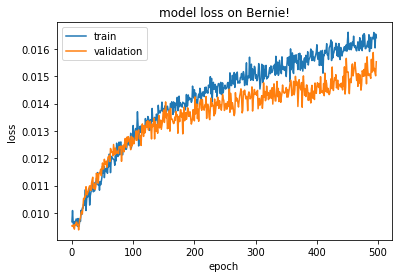

In [130]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( data.x[ data.region=='train' ], eras_y, test_size=0.5 )

model_dense = Sequential([
    Dense(32, input_shape=(50,)),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Dropout(0.3),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(121),
    Activation('softmax'),
])

model_dense.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_crossentropy','acc'])

history = model_dense.fit(Xtrain, 
                    Ytrain, 
                    validation_data=(Xtest,Ytest), 
                    epochs=500, 
                    batch_size=10000, 
                    shuffle=True)



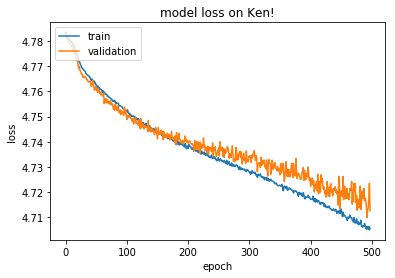

In [136]:
plot(history, title='Ken', metric='loss')

In [138]:
era_preds = np.argmax( model_dense.predict( data.x ), axis=1 )

In [147]:
from scipy import stats

stats.mode(era_preds)

ModeResult(mode=array([58], dtype=int64), count=array([152778]))

(array([7.80000e+01, 7.70000e+01, 1.00000e+00, 2.56100e+03, 2.64300e+03,
        1.15300e+03, 1.06200e+03, 8.84000e+02, 8.72300e+03, 9.60000e+02,
        1.68700e+03, 3.74600e+03, 3.64700e+03, 1.01000e+02, 1.03780e+04,
        4.96300e+03, 9.70000e+02, 0.00000e+00, 3.83400e+03, 7.63520e+04,
        1.57500e+03, 8.11870e+04, 2.78800e+03, 1.62291e+05, 9.90040e+04,
        2.50120e+04, 2.49720e+04, 2.59770e+04, 8.00700e+03, 5.98400e+03,
        5.03000e+02, 2.66730e+04, 2.37310e+04, 2.07070e+04, 1.11470e+04,
        5.58900e+03, 5.80000e+01, 8.86400e+03, 4.12100e+03, 1.02800e+03,
        2.15570e+04, 1.33310e+04, 5.64700e+03, 4.89310e+04, 2.82350e+04,
        9.27600e+03, 1.53620e+04, 2.83440e+04, 6.50000e+02, 2.34000e+03]),
 array([  4.  ,   6.32,   8.64,  10.96,  13.28,  15.6 ,  17.92,  20.24,
         22.56,  24.88,  27.2 ,  29.52,  31.84,  34.16,  36.48,  38.8 ,
         41.12,  43.44,  45.76,  48.08,  50.4 ,  52.72,  55.04,  57.36,
         59.68,  62.  ,  64.32,  66.64,  68.96,  71.

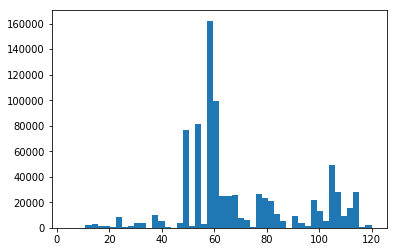

In [142]:
from matplotlib import pyplot

pyplot.hist(era_preds, bins=50)

In [150]:
len(era_data)

120

In [164]:
era_models = era_data | select( lambda era: GetEraModel( era[0], era[1], era[2], era[3] ) ) | as_list

Train on 1601 samples, validate on 789 samples
Epoch 1/20
1601/1601 [==============================] - ETA: 0s - loss: 0.7087 - binary_crossentropy: 0.708 - 2s 1ms/step - loss: 0.7048 - binary_crossentropy: 0.7048 - val_loss: 0.6910 - val_binary_crossentropy: 0.6910
Epoch 2/20
1601/1601 [==============================] - ETA: 0s - loss: 0.6972 - binary_crossentropy: 0.697 - 0s 7us/step - loss: 0.7004 - binary_crossentropy: 0.7004 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934
Epoch 3/20
1601/1601 [==============================] - ETA: 0s - loss: 0.6990 - binary_crossentropy: 0.699 - 0s 7us/step - loss: 0.6990 - binary_crossentropy: 0.6990 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931
Epoch 4/20
1601/1601 [==============================] - ETA: 0s - loss: 0.6937 - binary_crossentropy: 0.693 - 0s 7us/step - loss: 0.6958 - binary_crossentropy: 0.6958 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 5/20
1601/1601 [==============================] - ETA: 0s - loss: 0

Epoch 18/20
2415/2415 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.691 - 0s 7us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 19/20
2415/2415 [==============================] - ETA: 0s - loss: 0.6956 - binary_crossentropy: 0.695 - 0s 7us/step - loss: 0.6909 - binary_crossentropy: 0.6909 - val_loss: 0.6907 - val_binary_crossentropy: 0.6907
Epoch 20/20
2415/2415 [==============================] - ETA: 0s - loss: 0.6878 - binary_crossentropy: 0.687 - 0s 7us/step - loss: 0.6892 - binary_crossentropy: 0.6892 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904
Train on 3017 samples, validate on 1486 samples
Epoch 1/20
3017/3017 [==============================] - ETA: 3s - loss: 0.7245 - binary_crossentropy: 0.724 - 2s 620us/step - loss: 0.7121 - binary_crossentropy: 0.7121 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 2/20
3017/3017 [==============================] - ETA: 0s - l

Epoch 15/20
2364/2364 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.692 - 0s 7us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 16/20
2364/2364 [==============================] - ETA: 0s - loss: 0.6857 - binary_crossentropy: 0.685 - 0s 7us/step - loss: 0.6870 - binary_crossentropy: 0.6870 - val_loss: 0.6889 - val_binary_crossentropy: 0.6889
Epoch 17/20
2364/2364 [==============================] - ETA: 0s - loss: 0.6867 - binary_crossentropy: 0.686 - 0s 7us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 18/20
2364/2364 [==============================] - ETA: 0s - loss: 0.6875 - binary_crossentropy: 0.687 - 0s 8us/step - loss: 0.6855 - binary_crossentropy: 0.6855 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 19/20
2364/2364 [==============================] - ETA: 0s - loss: 0.6803 - binary_crossentropy: 0.680 - 0s 7u

Epoch 12/20
2936/2936 [==============================] - ETA: 0s - loss: 0.6928 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 13/20
2936/2936 [==============================] - ETA: 0s - loss: 0.6942 - binary_crossentropy: 0.694 - 0s 6us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 14/20
2936/2936 [==============================] - ETA: 0s - loss: 0.6926 - binary_crossentropy: 0.692 - 0s 6us/step - loss: 0.6915 - binary_crossentropy: 0.6915 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 15/20
2936/2936 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.692 - 0s 6us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 16/20
2936/2936 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 6u

Epoch 9/20
2776/2776 [==============================] - ETA: 0s - loss: 0.6894 - binary_crossentropy: 0.689 - 0s 6us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - val_loss: 0.6889 - val_binary_crossentropy: 0.6889
Epoch 10/20
2776/2776 [==============================] - ETA: 0s - loss: 0.6889 - binary_crossentropy: 0.688 - 0s 6us/step - loss: 0.6883 - binary_crossentropy: 0.6883 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 11/20
2776/2776 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 6us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 12/20
2776/2776 [==============================] - ETA: 0s - loss: 0.6855 - binary_crossentropy: 0.685 - 0s 6us/step - loss: 0.6883 - binary_crossentropy: 0.6883 - val_loss: 0.6878 - val_binary_crossentropy: 0.6878
Epoch 13/20
2776/2776 [==============================] - ETA: 0s - loss: 0.6918 - binary_crossentropy: 0.691 - 0s 6us

Epoch 6/20
2982/2982 [==============================] - ETA: 0s - loss: 0.6951 - binary_crossentropy: 0.695 - 0s 6us/step - loss: 0.6938 - binary_crossentropy: 0.6938 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 7/20
2982/2982 [==============================] - ETA: 0s - loss: 0.6891 - binary_crossentropy: 0.689 - 0s 6us/step - loss: 0.6900 - binary_crossentropy: 0.6900 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 8/20
2982/2982 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 6us/step - loss: 0.6898 - binary_crossentropy: 0.6898 - val_loss: 0.6873 - val_binary_crossentropy: 0.6873
Epoch 9/20
2982/2982 [==============================] - ETA: 0s - loss: 0.6892 - binary_crossentropy: 0.689 - 0s 6us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 10/20
2982/2982 [==============================] - ETA: 0s - loss: 0.6877 - binary_crossentropy: 0.687 - 0s 6us/st

Epoch 3/20
2937/2937 [==============================] - ETA: 0s - loss: 0.6977 - binary_crossentropy: 0.697 - 0s 6us/step - loss: 0.6968 - binary_crossentropy: 0.6968 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 4/20
2937/2937 [==============================] - ETA: 0s - loss: 0.6958 - binary_crossentropy: 0.695 - 0s 6us/step - loss: 0.6960 - binary_crossentropy: 0.6960 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926
Epoch 5/20
2937/2937 [==============================] - ETA: 0s - loss: 0.6934 - binary_crossentropy: 0.693 - 0s 6us/step - loss: 0.6952 - binary_crossentropy: 0.6952 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922
Epoch 6/20
2937/2937 [==============================] - ETA: 0s - loss: 0.6940 - binary_crossentropy: 0.694 - 0s 6us/step - loss: 0.6942 - binary_crossentropy: 0.6942 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 7/20
2937/2937 [==============================] - ETA: 0s - loss: 0.6944 - binary_crossentropy: 0.694 - 0s 6us/ste

Epoch 20/20
2996/2996 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.686 - 0s 6us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - val_loss: 0.6885 - val_binary_crossentropy: 0.6885
Train on 3165 samples, validate on 1559 samples
Epoch 1/20
3165/3165 [==============================] - ETA: 4s - loss: 0.6944 - binary_crossentropy: 0.694 - 3s 803us/step - loss: 0.6991 - binary_crossentropy: 0.6991 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 2/20
3165/3165 [==============================] - ETA: 0s - loss: 0.6975 - binary_crossentropy: 0.697 - 0s 7us/step - loss: 0.6970 - binary_crossentropy: 0.6970 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 3/20
3165/3165 [==============================] - ETA: 0s - loss: 0.6960 - binary_crossentropy: 0.696 - 0s 7us/step - loss: 0.6961 - binary_crossentropy: 0.6961 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 4/20
3165/3165 [==============================] - ETA: 0s - los

Epoch 17/20
3135/3135 [==============================] - ETA: 0s - loss: 0.6874 - binary_crossentropy: 0.687 - 0s 7us/step - loss: 0.6881 - binary_crossentropy: 0.6881 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 18/20
3135/3135 [==============================] - ETA: 0s - loss: 0.6873 - binary_crossentropy: 0.687 - 0s 7us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6830 - val_binary_crossentropy: 0.6830
Epoch 19/20
3135/3135 [==============================] - ETA: 0s - loss: 0.6868 - binary_crossentropy: 0.686 - 0s 7us/step - loss: 0.6876 - binary_crossentropy: 0.6876 - val_loss: 0.6859 - val_binary_crossentropy: 0.6859
Epoch 20/20
3135/3135 [==============================] - ETA: 0s - loss: 0.6838 - binary_crossentropy: 0.683 - 0s 7us/step - loss: 0.6853 - binary_crossentropy: 0.6853 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Train on 3236 samples, validate on 1595 samples
Epoch 1/20
3236/3236 [==============================] - ETA: 5s - lo

Epoch 14/20
2832/2832 [==============================] - ETA: 0s - loss: 0.6931 - binary_crossentropy: 0.693 - 0s 6us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 15/20
2832/2832 [==============================] - ETA: 0s - loss: 0.6915 - binary_crossentropy: 0.691 - 0s 6us/step - loss: 0.6915 - binary_crossentropy: 0.6915 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 16/20
2832/2832 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.691 - 0s 7us/step - loss: 0.6916 - binary_crossentropy: 0.6916 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 17/20
2832/2832 [==============================] - ETA: 0s - loss: 0.6935 - binary_crossentropy: 0.693 - 0s 6us/step - loss: 0.6920 - binary_crossentropy: 0.6920 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 18/20
2832/2832 [==============================] - ETA: 0s - loss: 0.6894 - binary_crossentropy: 0.689 - 0s 7u

Epoch 11/20
2872/2872 [==============================] - ETA: 0s - loss: 0.6878 - binary_crossentropy: 0.687 - 0s 6us/step - loss: 0.6904 - binary_crossentropy: 0.6904 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 12/20
2872/2872 [==============================] - ETA: 0s - loss: 0.6902 - binary_crossentropy: 0.690 - 0s 7us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 13/20
2872/2872 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.690 - 0s 6us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - val_loss: 0.6877 - val_binary_crossentropy: 0.6877
Epoch 14/20
2872/2872 [==============================] - ETA: 0s - loss: 0.6836 - binary_crossentropy: 0.683 - 0s 6us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - val_loss: 0.6872 - val_binary_crossentropy: 0.6872
Epoch 15/20
2872/2872 [==============================] - ETA: 0s - loss: 0.6850 - binary_crossentropy: 0.685 - 0s 6u

Epoch 8/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 6us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - val_loss: 0.6868 - val_binary_crossentropy: 0.6868
Epoch 9/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6889 - binary_crossentropy: 0.688 - 0s 8us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - val_loss: 0.6865 - val_binary_crossentropy: 0.6865
Epoch 10/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6861 - binary_crossentropy: 0.686 - 0s 6us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 11/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6851 - binary_crossentropy: 0.685 - 0s 6us/step - loss: 0.6865 - binary_crossentropy: 0.6865 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 12/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6872 - binary_crossentropy: 0.687 - 0s 7us/

Epoch 5/20
2696/2696 [==============================] - ETA: 0s - loss: 0.6909 - binary_crossentropy: 0.690 - 0s 7us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 6/20
2696/2696 [==============================] - ETA: 0s - loss: 0.6929 - binary_crossentropy: 0.692 - 0s 7us/step - loss: 0.6911 - binary_crossentropy: 0.6911 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 7/20
2696/2696 [==============================] - ETA: 0s - loss: 0.6933 - binary_crossentropy: 0.693 - 0s 7us/step - loss: 0.6916 - binary_crossentropy: 0.6916 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 8/20
2696/2696 [==============================] - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - 0s 7us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909
Epoch 9/20
2696/2696 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.692 - 0s 7us/ste

Epoch 2/20
3082/3082 [==============================] - ETA: 0s - loss: 0.6957 - binary_crossentropy: 0.695 - 0s 8us/step - loss: 0.6983 - binary_crossentropy: 0.6983 - val_loss: 0.6939 - val_binary_crossentropy: 0.6939
Epoch 3/20
3082/3082 [==============================] - ETA: 0s - loss: 0.6977 - binary_crossentropy: 0.697 - 0s 7us/step - loss: 0.6952 - binary_crossentropy: 0.6952 - val_loss: 0.6972 - val_binary_crossentropy: 0.6972
Epoch 4/20
3082/3082 [==============================] - ETA: 0s - loss: 0.6976 - binary_crossentropy: 0.697 - 0s 7us/step - loss: 0.6959 - binary_crossentropy: 0.6959 - val_loss: 0.6987 - val_binary_crossentropy: 0.6987
Epoch 5/20
3082/3082 [==============================] - ETA: 0s - loss: 0.6943 - binary_crossentropy: 0.694 - 0s 7us/step - loss: 0.6943 - binary_crossentropy: 0.6943 - val_loss: 0.6941 - val_binary_crossentropy: 0.6941
Epoch 6/20
3082/3082 [==============================] - ETA: 0s - loss: 0.6955 - binary_crossentropy: 0.695 - 0s 7us/ste

Epoch 19/20
3005/3005 [==============================] - ETA: 0s - loss: 0.6929 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6946 - binary_crossentropy: 0.6946 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 20/20
3005/3005 [==============================] - ETA: 0s - loss: 0.6934 - binary_crossentropy: 0.693 - 0s 8us/step - loss: 0.6931 - binary_crossentropy: 0.6931 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Train on 3148 samples, validate on 1551 samples
Epoch 1/20
3148/3148 [==============================] - ETA: 6s - loss: 0.6949 - binary_crossentropy: 0.694 - 3s 1ms/step - loss: 0.6939 - binary_crossentropy: 0.6939 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 2/20
3148/3148 [==============================] - ETA: 0s - loss: 0.6918 - binary_crossentropy: 0.691 - 0s 8us/step - loss: 0.6934 - binary_crossentropy: 0.6934 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 3/20
3148/3148 [==============================] - ETA: 0s - loss

Epoch 16/20
2568/2568 [==============================] - ETA: 0s - loss: 0.6546 - binary_crossentropy: 0.654 - 0s 7us/step - loss: 0.6556 - binary_crossentropy: 0.6556 - val_loss: 0.6548 - val_binary_crossentropy: 0.6548
Epoch 17/20
2568/2568 [==============================] - ETA: 0s - loss: 0.6533 - binary_crossentropy: 0.653 - 0s 7us/step - loss: 0.6532 - binary_crossentropy: 0.6532 - val_loss: 0.6539 - val_binary_crossentropy: 0.6539
Epoch 18/20
2568/2568 [==============================] - ETA: 0s - loss: 0.6696 - binary_crossentropy: 0.669 - 0s 7us/step - loss: 0.6565 - binary_crossentropy: 0.6565 - val_loss: 0.6535 - val_binary_crossentropy: 0.6535
Epoch 19/20
2568/2568 [==============================] - ETA: 0s - loss: 0.6591 - binary_crossentropy: 0.659 - 0s 7us/step - loss: 0.6532 - binary_crossentropy: 0.6532 - val_loss: 0.6541 - val_binary_crossentropy: 0.6541
Epoch 20/20
2568/2568 [==============================] - ETA: 0s - loss: 0.6587 - binary_crossentropy: 0.658 - 0s 7u

Epoch 13/20
3261/3261 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 7us/step - loss: 0.6889 - binary_crossentropy: 0.6889 - val_loss: 0.6850 - val_binary_crossentropy: 0.6850
Epoch 14/20
3261/3261 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 7us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - val_loss: 0.6846 - val_binary_crossentropy: 0.6846
Epoch 15/20
3261/3261 [==============================] - ETA: 0s - loss: 0.6852 - binary_crossentropy: 0.685 - 0s 7us/step - loss: 0.6873 - binary_crossentropy: 0.6873 - val_loss: 0.6838 - val_binary_crossentropy: 0.6838
Epoch 16/20
3261/3261 [==============================] - ETA: 0s - loss: 0.6837 - binary_crossentropy: 0.683 - 0s 7us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - val_loss: 0.6832 - val_binary_crossentropy: 0.6832
Epoch 17/20
3261/3261 [==============================] - ETA: 0s - loss: 0.6821 - binary_crossentropy: 0.682 - 0s 7u

Epoch 10/20
2132/2132 [==============================] - ETA: 0s - loss: 0.6936 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - val_loss: 0.6907 - val_binary_crossentropy: 0.6907
Epoch 11/20
2132/2132 [==============================] - ETA: 0s - loss: 0.6913 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6925 - binary_crossentropy: 0.6925 - val_loss: 0.6897 - val_binary_crossentropy: 0.6897
Epoch 12/20
2132/2132 [==============================] - ETA: 0s - loss: 0.6936 - binary_crossentropy: 0.693 - 0s 8us/step - loss: 0.6926 - binary_crossentropy: 0.6926 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 13/20
2132/2132 [==============================] - ETA: 0s - loss: 0.6918 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6886 - val_binary_crossentropy: 0.6886
Epoch 14/20
2132/2132 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 9u

Epoch 7/20
3240/3240 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 7us/step - loss: 0.6915 - binary_crossentropy: 0.6915 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 8/20
3240/3240 [==============================] - ETA: 0s - loss: 0.6933 - binary_crossentropy: 0.693 - 0s 7us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - val_loss: 0.6895 - val_binary_crossentropy: 0.6895
Epoch 9/20
3240/3240 [==============================] - ETA: 0s - loss: 0.6931 - binary_crossentropy: 0.693 - 0s 7us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898
Epoch 10/20
3240/3240 [==============================] - ETA: 0s - loss: 0.6911 - binary_crossentropy: 0.691 - 0s 7us/step - loss: 0.6901 - binary_crossentropy: 0.6901 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903
Epoch 11/20
3240/3240 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 7us/s

Epoch 4/20
3094/3094 [==============================] - ETA: 0s - loss: 0.6964 - binary_crossentropy: 0.696 - 0s 8us/step - loss: 0.6957 - binary_crossentropy: 0.6957 - val_loss: 0.6891 - val_binary_crossentropy: 0.6891
Epoch 5/20
3094/3094 [==============================] - ETA: 0s - loss: 0.6919 - binary_crossentropy: 0.691 - 0s 8us/step - loss: 0.6931 - binary_crossentropy: 0.6931 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 6/20
3094/3094 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 8us/step - loss: 0.6915 - binary_crossentropy: 0.6915 - val_loss: 0.6873 - val_binary_crossentropy: 0.6873
Epoch 7/20
3094/3094 [==============================] - ETA: 0s - loss: 0.6908 - binary_crossentropy: 0.690 - 0s 8us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6873 - val_binary_crossentropy: 0.6873
Epoch 8/20
3094/3094 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.692 - 0s 8us/ste

Train on 2979 samples, validate on 1468 samples
Epoch 1/20
2979/2979 [==============================] - ETA: 7s - loss: 0.6958 - binary_crossentropy: 0.695 - 4s 1ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931
Epoch 2/20
2979/2979 [==============================] - ETA: 0s - loss: 0.6981 - binary_crossentropy: 0.698 - 0s 7us/step - loss: 0.6969 - binary_crossentropy: 0.6969 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 3/20
2979/2979 [==============================] - ETA: 0s - loss: 0.6945 - binary_crossentropy: 0.694 - 0s 7us/step - loss: 0.6957 - binary_crossentropy: 0.6957 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 4/20
2979/2979 [==============================] - ETA: 0s - loss: 0.6955 - binary_crossentropy: 0.695 - 0s 7us/step - loss: 0.6938 - binary_crossentropy: 0.6938 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932
Epoch 5/20
2979/2979 [==============================] - ETA: 0s - loss: 

Epoch 18/20
2972/2972 [==============================] - ETA: 0s - loss: 0.6865 - binary_crossentropy: 0.686 - 0s 7us/step - loss: 0.6877 - binary_crossentropy: 0.6877 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926
Epoch 19/20
2972/2972 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 7us/step - loss: 0.6895 - binary_crossentropy: 0.6895 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 20/20
2972/2972 [==============================] - ETA: 0s - loss: 0.6948 - binary_crossentropy: 0.694 - 0s 7us/step - loss: 0.6894 - binary_crossentropy: 0.6894 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Train on 2866 samples, validate on 1412 samples
Epoch 1/20
2866/2866 [==============================] - ETA: 6s - loss: 0.7381 - binary_crossentropy: 0.738 - 4s 1ms/step - loss: 0.7307 - binary_crossentropy: 0.7307 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950
Epoch 2/20
2866/2866 [==============================] - ETA: 0s - los

Epoch 15/20
3202/3202 [==============================] - ETA: 0s - loss: 0.6928 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6926 - binary_crossentropy: 0.6926 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 16/20
3202/3202 [==============================] - ETA: 0s - loss: 0.6929 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922
Epoch 17/20
3202/3202 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 18/20
3202/3202 [==============================] - ETA: 0s - loss: 0.6936 - binary_crossentropy: 0.693 - 0s 8us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 19/20
3202/3202 [==============================] - ETA: 0s - loss: 0.6900 - binary_crossentropy: 0.690 - 0s 7u

Epoch 12/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 7us/step - loss: 0.6900 - binary_crossentropy: 0.6900 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903
Epoch 13/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6864 - binary_crossentropy: 0.686 - 0s 7us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898
Epoch 14/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6902 - binary_crossentropy: 0.690 - 0s 7us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - val_loss: 0.6888 - val_binary_crossentropy: 0.6888
Epoch 15/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6863 - binary_crossentropy: 0.686 - 0s 8us/step - loss: 0.6876 - binary_crossentropy: 0.6876 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881
Epoch 16/20
2993/2993 [==============================] - ETA: 0s - loss: 0.6843 - binary_crossentropy: 0.684 - 0s 8u

Epoch 9/20
2648/2648 [==============================] - ETA: 0s - loss: 0.6914 - binary_crossentropy: 0.691 - 0s 8us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 10/20
2648/2648 [==============================] - ETA: 0s - loss: 0.6955 - binary_crossentropy: 0.695 - 0s 8us/step - loss: 0.6931 - binary_crossentropy: 0.6931 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 11/20
2648/2648 [==============================] - ETA: 0s - loss: 0.6940 - binary_crossentropy: 0.694 - 0s 8us/step - loss: 0.6925 - binary_crossentropy: 0.6925 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 12/20
2648/2648 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 8us/step - loss: 0.6916 - binary_crossentropy: 0.6916 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 13/20
2648/2648 [==============================] - ETA: 0s - loss: 0.6936 - binary_crossentropy: 0.693 - 0s 9us

Epoch 6/20
2588/2588 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934
Epoch 7/20
2588/2588 [==============================] - ETA: 0s - loss: 0.6953 - binary_crossentropy: 0.695 - 0s 8us/step - loss: 0.6931 - binary_crossentropy: 0.6931 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 8/20
2588/2588 [==============================] - ETA: 0s - loss: 0.6907 - binary_crossentropy: 0.690 - 0s 8us/step - loss: 0.6931 - binary_crossentropy: 0.6931 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 9/20
2588/2588 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.691 - 0s 8us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 10/20
2588/2588 [==============================] - ETA: 0s - loss: 0.6909 - binary_crossentropy: 0.690 - 0s 8us/st

Epoch 3/20
1811/1811 [==============================] - ETA: 0s - loss: 0.6968 - binary_crossentropy: 0.696 - 0s 8us/step - loss: 0.6979 - binary_crossentropy: 0.6979 - val_loss: 0.6990 - val_binary_crossentropy: 0.6990
Epoch 4/20
1811/1811 [==============================] - ETA: 0s - loss: 0.6967 - binary_crossentropy: 0.696 - 0s 8us/step - loss: 0.6992 - binary_crossentropy: 0.6992 - val_loss: 0.7029 - val_binary_crossentropy: 0.7029
Epoch 5/20
1811/1811 [==============================] - ETA: 0s - loss: 0.7128 - binary_crossentropy: 0.712 - 0s 8us/step - loss: 0.7053 - binary_crossentropy: 0.7053 - val_loss: 0.7026 - val_binary_crossentropy: 0.7026
Epoch 6/20
1811/1811 [==============================] - ETA: 0s - loss: 0.7121 - binary_crossentropy: 0.712 - 0s 8us/step - loss: 0.7079 - binary_crossentropy: 0.7079 - val_loss: 0.6997 - val_binary_crossentropy: 0.6997
Epoch 7/20
1811/1811 [==============================] - ETA: 0s - loss: 0.6987 - binary_crossentropy: 0.698 - 0s 8us/ste

Epoch 20/20
3205/3205 [==============================] - ETA: 0s - loss: 0.6905 - binary_crossentropy: 0.690 - 0s 8us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Train on 2711 samples, validate on 1336 samples
Epoch 1/20
2711/2711 [==============================] - ETA: 7s - loss: 0.6934 - binary_crossentropy: 0.693 - 5s 2ms/step - loss: 0.7018 - binary_crossentropy: 0.7018 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 2/20
2711/2711 [==============================] - ETA: 0s - loss: 0.7032 - binary_crossentropy: 0.703 - 0s 8us/step - loss: 0.7011 - binary_crossentropy: 0.7011 - val_loss: 0.6936 - val_binary_crossentropy: 0.6936
Epoch 3/20
2711/2711 [==============================] - ETA: 0s - loss: 0.6946 - binary_crossentropy: 0.694 - 0s 8us/step - loss: 0.6947 - binary_crossentropy: 0.6947 - val_loss: 0.6985 - val_binary_crossentropy: 0.6985
Epoch 4/20
2711/2711 [==============================] - ETA: 0s - loss:

Epoch 17/20
3134/3134 [==============================] - ETA: 0s - loss: 0.6936 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6938 - binary_crossentropy: 0.6938 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926
Epoch 18/20
3134/3134 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6935 - binary_crossentropy: 0.6935 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926
Epoch 19/20
3134/3134 [==============================] - ETA: 0s - loss: 0.6913 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6932 - binary_crossentropy: 0.6932 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 20/20
3134/3134 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6921 - binary_crossentropy: 0.6921 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935
Train on 3267 samples, validate on 1610 samples
Epoch 1/20
3267/3267 [==============================] - ETA: 10s - l

Epoch 14/20
1974/1974 [==============================] - ETA: 0s - loss: 0.6885 - binary_crossentropy: 0.688 - 0s 8us/step - loss: 0.6895 - binary_crossentropy: 0.6895 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904
Epoch 15/20
1974/1974 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6913 - binary_crossentropy: 0.6913 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901
Epoch 16/20
1974/1974 [==============================] - ETA: 0s - loss: 0.6948 - binary_crossentropy: 0.694 - 0s 8us/step - loss: 0.6936 - binary_crossentropy: 0.6936 - val_loss: 0.6896 - val_binary_crossentropy: 0.6896
Epoch 17/20
1974/1974 [==============================] - ETA: 0s - loss: 0.6919 - binary_crossentropy: 0.691 - 0s 7us/step - loss: 0.6898 - binary_crossentropy: 0.6898 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893
Epoch 18/20
1974/1974 [==============================] - ETA: 0s - loss: 0.6905 - binary_crossentropy: 0.690 - 0s 8

Epoch 11/20
3276/3276 [==============================] - ETA: 0s - loss: 0.6898 - binary_crossentropy: 0.689 - 0s 8us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 12/20
3276/3276 [==============================] - ETA: 0s - loss: 0.6871 - binary_crossentropy: 0.687 - 0s 9us/step - loss: 0.6886 - binary_crossentropy: 0.6886 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 13/20
3276/3276 [==============================] - ETA: 0s - loss: 0.6897 - binary_crossentropy: 0.689 - 0s 8us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - val_loss: 0.6863 - val_binary_crossentropy: 0.6863
Epoch 14/20
3276/3276 [==============================] - ETA: 0s - loss: 0.6906 - binary_crossentropy: 0.690 - 0s 8us/step - loss: 0.6881 - binary_crossentropy: 0.6881 - val_loss: 0.6839 - val_binary_crossentropy: 0.6839
Epoch 15/20
3276/3276 [==============================] - ETA: 0s - loss: 0.6891 - binary_crossentropy: 0.689 - 0s 9u

Epoch 8/20
3042/3042 [==============================] - ETA: 0s - loss: 0.6879 - binary_crossentropy: 0.687 - 0s 9us/step - loss: 0.6920 - binary_crossentropy: 0.6920 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915
Epoch 9/20
3042/3042 [==============================] - ETA: 0s - loss: 0.6891 - binary_crossentropy: 0.689 - 0s 9us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903
Epoch 10/20
3042/3042 [==============================] - ETA: 0s - loss: 0.6893 - binary_crossentropy: 0.689 - 0s 9us/step - loss: 0.6914 - binary_crossentropy: 0.6914 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901
Epoch 11/20
3042/3042 [==============================] - ETA: 0s - loss: 0.6939 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6926 - binary_crossentropy: 0.6926 - val_loss: 0.6897 - val_binary_crossentropy: 0.6897
Epoch 12/20
3042/3042 [==============================] - ETA: 0s - loss: 0.6902 - binary_crossentropy: 0.690 - 0s 9us/

Epoch 5/20
3049/3049 [==============================] - ETA: 0s - loss: 0.6914 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6939 - binary_crossentropy: 0.6939 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 6/20
3049/3049 [==============================] - ETA: 0s - loss: 0.6911 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6911 - binary_crossentropy: 0.6911 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 7/20
3049/3049 [==============================] - ETA: 0s - loss: 0.6909 - binary_crossentropy: 0.690 - 0s 9us/step - loss: 0.6909 - binary_crossentropy: 0.6909 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 8/20
3049/3049 [==============================] - ETA: 0s - loss: 0.6941 - binary_crossentropy: 0.694 - 0s 9us/step - loss: 0.6903 - binary_crossentropy: 0.6903 - val_loss: 0.6862 - val_binary_crossentropy: 0.6862
Epoch 9/20
3049/3049 [==============================] - ETA: 0s - loss: 0.6916 - binary_crossentropy: 0.691 - 0s 9us/ste

Epoch 2/20
1717/1717 [==============================] - ETA: 0s - loss: 0.6904 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - val_loss: 0.6891 - val_binary_crossentropy: 0.6891
Epoch 3/20
1717/1717 [==============================] - ETA: 0s - loss: 0.6948 - binary_crossentropy: 0.694 - 0s 9us/step - loss: 0.6951 - binary_crossentropy: 0.6951 - val_loss: 0.6878 - val_binary_crossentropy: 0.6878
Epoch 4/20
1717/1717 [==============================] - ETA: 0s - loss: 0.6880 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6908 - binary_crossentropy: 0.6908 - val_loss: 0.6869 - val_binary_crossentropy: 0.6869
Epoch 5/20
1717/1717 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.692 - 0s 9us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - val_loss: 0.6865 - val_binary_crossentropy: 0.6865
Epoch 6/20
1717/1717 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 9us/s

Epoch 19/20
2954/2954 [==============================] - ETA: 0s - loss: 0.6814 - binary_crossentropy: 0.681 - 0s 8us/step - loss: 0.6833 - binary_crossentropy: 0.6833 - val_loss: 0.6772 - val_binary_crossentropy: 0.6772
Epoch 20/20
2954/2954 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 7us/step - loss: 0.6844 - binary_crossentropy: 0.6844 - val_loss: 0.6761 - val_binary_crossentropy: 0.6761
Train on 3047 samples, validate on 1502 samples
Epoch 1/20
3047/3047 [==============================] - ETA: 10s - loss: 0.6969 - binary_crossentropy: 0.69 - 6s 2ms/step - loss: 0.6965 - binary_crossentropy: 0.6965 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 2/20
3047/3047 [==============================] - ETA: 0s - loss: 0.6959 - binary_crossentropy: 0.695 - 0s 9us/step - loss: 0.6950 - binary_crossentropy: 0.6950 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 3/20
3047/3047 [==============================] - ETA: 0s - loss

Epoch 16/20
3106/3106 [==============================] - ETA: 0s - loss: 0.6862 - binary_crossentropy: 0.686 - 0s 9us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - val_loss: 0.6872 - val_binary_crossentropy: 0.6872
Epoch 17/20
3106/3106 [==============================] - ETA: 0s - loss: 0.6885 - binary_crossentropy: 0.688 - 0s 9us/step - loss: 0.6892 - binary_crossentropy: 0.6892 - val_loss: 0.6856 - val_binary_crossentropy: 0.6856
Epoch 18/20
3106/3106 [==============================] - ETA: 0s - loss: 0.6868 - binary_crossentropy: 0.686 - 0s 9us/step - loss: 0.6868 - binary_crossentropy: 0.6868 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 19/20
3106/3106 [==============================] - ETA: 0s - loss: 0.6847 - binary_crossentropy: 0.684 - 0s 9us/step - loss: 0.6862 - binary_crossentropy: 0.6862 - val_loss: 0.6853 - val_binary_crossentropy: 0.6853
Epoch 20/20
3106/3106 [==============================] - ETA: 0s - loss: 0.6885 - binary_crossentropy: 0.688 - 0s 9u

Epoch 13/20
2895/2895 [==============================] - ETA: 0s - loss: 0.6919 - binary_crossentropy: 0.691 - 0s 8us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900
Epoch 14/20
2895/2895 [==============================] - ETA: 0s - loss: 0.6911 - binary_crossentropy: 0.691 - 0s 8us/step - loss: 0.6921 - binary_crossentropy: 0.6921 - val_loss: 0.6899 - val_binary_crossentropy: 0.6899
Epoch 15/20
2895/2895 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898
Epoch 16/20
2895/2895 [==============================] - ETA: 0s - loss: 0.6907 - binary_crossentropy: 0.690 - 0s 9us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894
Epoch 17/20
2895/2895 [==============================] - ETA: 0s - loss: 0.6870 - binary_crossentropy: 0.687 - 0s 8u

Epoch 10/20
2051/2051 [==============================] - ETA: 0s - loss: 0.6961 - binary_crossentropy: 0.696 - 0s 11us/step - loss: 0.6947 - binary_crossentropy: 0.6947 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942
Epoch 11/20
2051/2051 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6945 - binary_crossentropy: 0.6945 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942
Epoch 12/20
2051/2051 [==============================] - ETA: 0s - loss: 0.6952 - binary_crossentropy: 0.695 - 0s 11us/step - loss: 0.6952 - binary_crossentropy: 0.6952 - val_loss: 0.6938 - val_binary_crossentropy: 0.6938
Epoch 13/20
2051/2051 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6931 - binary_crossentropy: 0.6931 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933
Epoch 14/20
2051/2051 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.692 - 0

Epoch 7/20
2958/2958 [==============================] - ETA: 0s - loss: 0.6886 - binary_crossentropy: 0.688 - 0s 8us/step - loss: 0.6897 - binary_crossentropy: 0.6897 - val_loss: 0.6897 - val_binary_crossentropy: 0.6897
Epoch 8/20
2958/2958 [==============================] - ETA: 0s - loss: 0.6898 - binary_crossentropy: 0.689 - 0s 8us/step - loss: 0.6886 - binary_crossentropy: 0.6886 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 9/20
2958/2958 [==============================] - ETA: 0s - loss: 0.6904 - binary_crossentropy: 0.690 - 0s 8us/step - loss: 0.6900 - binary_crossentropy: 0.6900 - val_loss: 0.6885 - val_binary_crossentropy: 0.6885
Epoch 10/20
2958/2958 [==============================] - ETA: 0s - loss: 0.6877 - binary_crossentropy: 0.687 - 0s 8us/step - loss: 0.6890 - binary_crossentropy: 0.6890 - val_loss: 0.6880 - val_binary_crossentropy: 0.6880
Epoch 11/20
2958/2958 [==============================] - ETA: 0s - loss: 0.6904 - binary_crossentropy: 0.690 - 0s 8us/s

Epoch 4/20
2375/2375 [==============================] - ETA: 0s - loss: 0.6943 - binary_crossentropy: 0.694 - 0s 10us/step - loss: 0.6935 - binary_crossentropy: 0.6935 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925
Epoch 5/20
2375/2375 [==============================] - ETA: 0s - loss: 0.6944 - binary_crossentropy: 0.694 - 0s 10us/step - loss: 0.6945 - binary_crossentropy: 0.6945 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 6/20
2375/2375 [==============================] - ETA: 0s - loss: 0.6893 - binary_crossentropy: 0.689 - 0s 10us/step - loss: 0.6916 - binary_crossentropy: 0.6916 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 7/20
2375/2375 [==============================] - ETA: 0s - loss: 0.6966 - binary_crossentropy: 0.696 - 0s 10us/step - loss: 0.6942 - binary_crossentropy: 0.6942 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915
Epoch 8/20
2375/2375 [==============================] - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - 0s 10u

Train on 2355 samples, validate on 1160 samples
Epoch 1/20
2355/2355 [==============================] - ETA: 8s - loss: 0.6969 - binary_crossentropy: 0.696 - 7s 3ms/step - loss: 0.6939 - binary_crossentropy: 0.6939 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 2/20
2355/2355 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 3/20
2355/2355 [==============================] - ETA: 0s - loss: 0.6934 - binary_crossentropy: 0.693 - 0s 10us/step - loss: 0.6937 - binary_crossentropy: 0.6937 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 4/20
2355/2355 [==============================] - ETA: 0s - loss: 0.6931 - binary_crossentropy: 0.693 - 0s 10us/step - loss: 0.6931 - binary_crossentropy: 0.6931 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 5/20
2355/2355 [==============================] - ETA: 0s - los

Epoch 18/20
2413/2413 [==============================] - ETA: 0s - loss: 0.6908 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6886 - binary_crossentropy: 0.6886 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956
Epoch 19/20
2413/2413 [==============================] - ETA: 0s - loss: 0.6915 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - val_loss: 0.6959 - val_binary_crossentropy: 0.6959
Epoch 20/20
2413/2413 [==============================] - ETA: 0s - loss: 0.6907 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Train on 2951 samples, validate on 1454 samples
Epoch 1/20
2951/2951 [==============================] - ETA: 11s - loss: 0.6966 - binary_crossentropy: 0.69 - 7s 2ms/step - loss: 0.6949 - binary_crossentropy: 0.6949 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922
Epoch 2/20
2951/2951 [==============================] - ETA: 0s - 

Epoch 15/20
3132/3132 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 9us/step - loss: 0.6897 - binary_crossentropy: 0.6897 - val_loss: 0.6870 - val_binary_crossentropy: 0.6870
Epoch 16/20
3132/3132 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6909 - binary_crossentropy: 0.6909 - val_loss: 0.6870 - val_binary_crossentropy: 0.6870
Epoch 17/20
3132/3132 [==============================] - ETA: 0s - loss: 0.6915 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6877 - val_binary_crossentropy: 0.6877
Epoch 18/20
3132/3132 [==============================] - ETA: 0s - loss: 0.6932 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6903 - binary_crossentropy: 0.6903 - val_loss: 0.6897 - val_binary_crossentropy: 0.6897
Epoch 19/20
3132/3132 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.690 - 0s 

Epoch 12/20
2247/2247 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 10us/step - loss: 0.6935 - binary_crossentropy: 0.6935 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926
Epoch 13/20
2247/2247 [==============================] - ETA: 0s - loss: 0.6971 - binary_crossentropy: 0.697 - 0s 10us/step - loss: 0.6948 - binary_crossentropy: 0.6948 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925
Epoch 14/20
2247/2247 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925
Epoch 15/20
2247/2247 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6940 - binary_crossentropy: 0.6940 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 16/20
2247/2247 [==============================] - ETA: 0s - loss: 0.6902 - binary_crossentropy: 0.690 - 0

Epoch 9/20
3209/3209 [==============================] - ETA: 0s - loss: 0.6905 - binary_crossentropy: 0.690 - 0s 9us/step - loss: 0.6925 - binary_crossentropy: 0.6925 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 10/20
3209/3209 [==============================] - ETA: 0s - loss: 0.6952 - binary_crossentropy: 0.695 - 0s 9us/step - loss: 0.6933 - binary_crossentropy: 0.6933 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 11/20
3209/3209 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 9us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 12/20
3209/3209 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 9us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922
Epoch 13/20
3209/3209 [==============================] - ETA: 0s - loss: 0.6920 - binary_crossentropy: 0.692 - 0s 9us

Epoch 6/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6947 - binary_crossentropy: 0.6947 - val_loss: 0.6954 - val_binary_crossentropy: 0.6954
Epoch 7/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6968 - binary_crossentropy: 0.696 - 0s 8us/step - loss: 0.6949 - binary_crossentropy: 0.6949 - val_loss: 0.6945 - val_binary_crossentropy: 0.6945
Epoch 8/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6943 - binary_crossentropy: 0.694 - 0s 8us/step - loss: 0.6953 - binary_crossentropy: 0.6953 - val_loss: 0.6938 - val_binary_crossentropy: 0.6938
Epoch 9/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6928 - binary_crossentropy: 0.692 - 0s 8us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933
Epoch 10/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6925 - binary_crossentropy: 0.692 - 0s 9us/st

Epoch 3/20
2974/2974 [==============================] - ETA: 0s - loss: 0.7023 - binary_crossentropy: 0.702 - 0s 9us/step - loss: 0.6993 - binary_crossentropy: 0.6993 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928
Epoch 4/20
2974/2974 [==============================] - ETA: 0s - loss: 0.6945 - binary_crossentropy: 0.694 - 0s 8us/step - loss: 0.6976 - binary_crossentropy: 0.6976 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934
Epoch 5/20
2974/2974 [==============================] - ETA: 0s - loss: 0.6982 - binary_crossentropy: 0.698 - 0s 8us/step - loss: 0.6984 - binary_crossentropy: 0.6984 - val_loss: 0.6949 - val_binary_crossentropy: 0.6949
Epoch 6/20
2974/2974 [==============================] - ETA: 0s - loss: 0.6953 - binary_crossentropy: 0.695 - 0s 9us/step - loss: 0.6975 - binary_crossentropy: 0.6975 - val_loss: 0.6948 - val_binary_crossentropy: 0.6948
Epoch 7/20
2974/2974 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 9us/ste

Epoch 20/20
3287/3287 [==============================] - ETA: 0s - loss: 0.6888 - binary_crossentropy: 0.688 - 0s 9us/step - loss: 0.6914 - binary_crossentropy: 0.6914 - val_loss: 0.6899 - val_binary_crossentropy: 0.6899
Train on 1624 samples, validate on 801 samples
Epoch 1/20
1624/1624 [==============================] - ETA: 4s - loss: 0.7023 - binary_crossentropy: 0.702 - 7s 5ms/step - loss: 0.7013 - binary_crossentropy: 0.7013 - val_loss: 0.6966 - val_binary_crossentropy: 0.6966
Epoch 2/20
1624/1624 [==============================] - ETA: 0s - loss: 0.6969 - binary_crossentropy: 0.696 - 0s 12us/step - loss: 0.6950 - binary_crossentropy: 0.6950 - val_loss: 0.6954 - val_binary_crossentropy: 0.6954
Epoch 3/20
1624/1624 [==============================] - ETA: 0s - loss: 0.6949 - binary_crossentropy: 0.694 - 0s 10us/step - loss: 0.6982 - binary_crossentropy: 0.6982 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935
Epoch 4/20
1624/1624 [==============================] - ETA: 0s - loss

Epoch 17/20
1634/1634 [==============================] - ETA: 0s - loss: 0.6840 - binary_crossentropy: 0.684 - 0s 10us/step - loss: 0.6832 - binary_crossentropy: 0.6832 - val_loss: 0.6823 - val_binary_crossentropy: 0.6823
Epoch 18/20
1634/1634 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 10us/step - loss: 0.6820 - binary_crossentropy: 0.6820 - val_loss: 0.6822 - val_binary_crossentropy: 0.6822
Epoch 19/20
1634/1634 [==============================] - ETA: 0s - loss: 0.6848 - binary_crossentropy: 0.684 - 0s 10us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - val_loss: 0.6825 - val_binary_crossentropy: 0.6825
Epoch 20/20
1634/1634 [==============================] - ETA: 0s - loss: 0.6815 - binary_crossentropy: 0.681 - 0s 10us/step - loss: 0.6836 - binary_crossentropy: 0.6836 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840
Train on 3029 samples, validate on 1492 samples
Epoch 1/20
3029/3029 [==============================] - ETA: 13s

Epoch 14/20
2600/2600 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 10us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 15/20
2600/2600 [==============================] - ETA: 0s - loss: 0.6933 - binary_crossentropy: 0.693 - 0s 10us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892
Epoch 16/20
2600/2600 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6918 - binary_crossentropy: 0.6918 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 17/20
2600/2600 [==============================] - ETA: 0s - loss: 0.6909 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - val_loss: 0.6887 - val_binary_crossentropy: 0.6887
Epoch 18/20
2600/2600 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0

Epoch 11/20
2930/2930 [==============================] - ETA: 0s - loss: 0.6887 - binary_crossentropy: 0.688 - 0s 9us/step - loss: 0.6894 - binary_crossentropy: 0.6894 - val_loss: 0.6872 - val_binary_crossentropy: 0.6872
Epoch 12/20
2930/2930 [==============================] - ETA: 0s - loss: 0.6898 - binary_crossentropy: 0.689 - 0s 9us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.6862 - val_binary_crossentropy: 0.6862
Epoch 13/20
2930/2930 [==============================] - ETA: 0s - loss: 0.6854 - binary_crossentropy: 0.685 - 0s 9us/step - loss: 0.6873 - binary_crossentropy: 0.6873 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 14/20
2930/2930 [==============================] - ETA: 0s - loss: 0.6890 - binary_crossentropy: 0.689 - 0s 9us/step - loss: 0.6871 - binary_crossentropy: 0.6871 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860
Epoch 15/20
2930/2930 [==============================] - ETA: 0s - loss: 0.6875 - binary_crossentropy: 0.687 - 0s 9u

Epoch 8/20
2660/2660 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6911 - binary_crossentropy: 0.6911 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 9/20
2660/2660 [==============================] - ETA: 0s - loss: 0.6914 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6908 - binary_crossentropy: 0.6908 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916
Epoch 10/20
2660/2660 [==============================] - ETA: 0s - loss: 0.6911 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 11/20
2660/2660 [==============================] - ETA: 0s - loss: 0.6911 - binary_crossentropy: 0.691 - 0s 13us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6910 - val_binary_crossentropy: 0.6910
Epoch 12/20
2660/2660 [==============================] - ETA: 0s - loss: 0.6915 - binary_crossentropy: 0.691 - 0s 10

Epoch 5/20
2964/2964 [==============================] - ETA: 0s - loss: 0.6927 - binary_crossentropy: 0.692 - 0s 9us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926
Epoch 6/20
2964/2964 [==============================] - ETA: 0s - loss: 0.6937 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920
Epoch 7/20
2964/2964 [==============================] - ETA: 0s - loss: 0.6935 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 8/20
2964/2964 [==============================] - ETA: 0s - loss: 0.6935 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6919 - binary_crossentropy: 0.6919 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 9/20
2964/2964 [==============================] - ETA: 0s - loss: 0.6907 - binary_crossentropy: 0.690 - 0s 9us/ste

Epoch 2/20
2897/2897 [==============================] - ETA: 0s - loss: 0.7008 - binary_crossentropy: 0.700 - 0s 10us/step - loss: 0.7020 - binary_crossentropy: 0.7020 - val_loss: 0.6936 - val_binary_crossentropy: 0.6936
Epoch 3/20
2897/2897 [==============================] - ETA: 0s - loss: 0.6988 - binary_crossentropy: 0.698 - 0s 10us/step - loss: 0.6967 - binary_crossentropy: 0.6967 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 4/20
2897/2897 [==============================] - ETA: 0s - loss: 0.6969 - binary_crossentropy: 0.696 - 0s 10us/step - loss: 0.6967 - binary_crossentropy: 0.6967 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934
Epoch 5/20
2897/2897 [==============================] - ETA: 0s - loss: 0.6935 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6950 - binary_crossentropy: 0.6950 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925
Epoch 6/20
2897/2897 [==============================] - ETA: 0s - loss: 0.6908 - binary_crossentropy: 0.690 - 0s 9us/

Epoch 19/20
2646/2646 [==============================] - ETA: 0s - loss: 0.6852 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6870 - binary_crossentropy: 0.6870 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912
Epoch 20/20
2646/2646 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6889 - binary_crossentropy: 0.6889 - val_loss: 0.6910 - val_binary_crossentropy: 0.6910
Train on 2283 samples, validate on 1125 samples
Epoch 1/20
2283/2283 [==============================] - ETA: 9s - loss: 0.6999 - binary_crossentropy: 0.699 - 8s 4ms/step - loss: 0.6985 - binary_crossentropy: 0.6985 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925
Epoch 2/20
2283/2283 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 12us/step - loss: 0.6956 - binary_crossentropy: 0.6956 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 3/20
2283/2283 [==============================] - ETA: 0s - l

Epoch 16/20
1944/1944 [==============================] - ETA: 0s - loss: 0.6948 - binary_crossentropy: 0.694 - 0s 9us/step - loss: 0.6951 - binary_crossentropy: 0.6951 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 17/20
1944/1944 [==============================] - ETA: 0s - loss: 0.6924 - binary_crossentropy: 0.692 - 0s 9us/step - loss: 0.6938 - binary_crossentropy: 0.6938 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 18/20
1944/1944 [==============================] - ETA: 0s - loss: 0.6899 - binary_crossentropy: 0.689 - 0s 9us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 19/20
1944/1944 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6934 - binary_crossentropy: 0.6934 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 20/20
1944/1944 [==============================] - ETA: 0s - loss: 0.6922 - binary_crossentropy: 0.692 - 0s 9u

Epoch 13/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6935 - binary_crossentropy: 0.693 - 0s 9us/step - loss: 0.6911 - binary_crossentropy: 0.6911 - val_loss: 0.6906 - val_binary_crossentropy: 0.6906
Epoch 14/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6915 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6917 - binary_crossentropy: 0.6917 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903
Epoch 15/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6913 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6920 - binary_crossentropy: 0.6920 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900
Epoch 16/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6910 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898
Epoch 17/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6921 - binary_crossentropy: 0.692 - 0s 9

Epoch 10/20
3030/3030 [==============================] - ETA: 0s - loss: 0.6956 - binary_crossentropy: 0.695 - 0s 11us/step - loss: 0.6937 - binary_crossentropy: 0.6937 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 11/20
3030/3030 [==============================] - ETA: 0s - loss: 0.6949 - binary_crossentropy: 0.694 - 0s 11us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927
Epoch 12/20
3030/3030 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 11us/step - loss: 0.6943 - binary_crossentropy: 0.6943 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 13/20
3030/3030 [==============================] - ETA: 0s - loss: 0.6929 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6933 - binary_crossentropy: 0.6933 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929
Epoch 14/20
3030/3030 [==============================] - ETA: 0s - loss: 0.6951 - binary_crossentropy: 0.695 - 0

Epoch 7/20
2923/2923 [==============================] - ETA: 0s - loss: 0.6917 - binary_crossentropy: 0.691 - 0s 9us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922
Epoch 8/20
2923/2923 [==============================] - ETA: 0s - loss: 0.6883 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6896 - binary_crossentropy: 0.6896 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917
Epoch 9/20
2923/2923 [==============================] - ETA: 0s - loss: 0.6907 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6896 - binary_crossentropy: 0.6896 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914
Epoch 10/20
2923/2923 [==============================] - ETA: 0s - loss: 0.6918 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913
Epoch 11/20
2923/2923 [==============================] - ETA: 0s - loss: 0.6885 - binary_crossentropy: 0.688 - 0s 10

Epoch 4/20
3286/3286 [==============================] - ETA: 0s - loss: 0.6913 - binary_crossentropy: 0.691 - 0s 10us/step - loss: 0.6937 - binary_crossentropy: 0.6937 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 5/20
3286/3286 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 10us/step - loss: 0.6935 - binary_crossentropy: 0.6935 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Epoch 6/20
3286/3286 [==============================] - ETA: 0s - loss: 0.6903 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - val_loss: 0.6921 - val_binary_crossentropy: 0.6921
Epoch 7/20
3286/3286 [==============================] - ETA: 0s - loss: 0.6901 - binary_crossentropy: 0.690 - 0s 10us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - val_loss: 0.6921 - val_binary_crossentropy: 0.6921
Epoch 8/20
3286/3286 [==============================] - ETA: 0s - loss: 0.6900 - binary_crossentropy: 0.690 - 0s 10u

Train on 3240 samples, validate on 1596 samples
Epoch 1/20
3240/3240 [==============================] - ETA: 18s - loss: 0.6947 - binary_crossentropy: 0.69 - 9s 3ms/step - loss: 0.6971 - binary_crossentropy: 0.6971 - val_loss: 0.6983 - val_binary_crossentropy: 0.6983
Epoch 2/20
3240/3240 [==============================] - ETA: 0s - loss: 0.7046 - binary_crossentropy: 0.704 - 0s 10us/step - loss: 0.7007 - binary_crossentropy: 0.7007 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924
Epoch 3/20
3240/3240 [==============================] - ETA: 0s - loss: 0.6927 - binary_crossentropy: 0.692 - 0s 10us/step - loss: 0.6942 - binary_crossentropy: 0.6942 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893
Epoch 4/20
3240/3240 [==============================] - ETA: 0s - loss: 0.6967 - binary_crossentropy: 0.696 - 0s 10us/step - loss: 0.6935 - binary_crossentropy: 0.6935 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890
Epoch 5/20
3240/3240 [==============================] - ETA: 0s - los

Epoch 18/20
3183/3183 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 11us/step - loss: 0.6900 - binary_crossentropy: 0.6900 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919
Epoch 19/20
3183/3183 [==============================] - ETA: 0s - loss: 0.6896 - binary_crossentropy: 0.689 - 0s 10us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923
Epoch 20/20
3183/3183 [==============================] - ETA: 0s - loss: 0.6923 - binary_crossentropy: 0.692 - 0s 11us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918
Train on 2469 samples, validate on 1217 samples
Epoch 1/20
2469/2469 [==============================] - ETA: 12s - loss: 0.6978 - binary_crossentropy: 0.69 - 9s 4ms/step - loss: 0.6999 - binary_crossentropy: 0.6999 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933
Epoch 2/20
2469/2469 [==============================] - ETA: 0s - 

Epoch 15/20
2878/2878 [==============================] - ETA: 0s - loss: 0.6849 - binary_crossentropy: 0.684 - 0s 9us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - val_loss: 0.6866 - val_binary_crossentropy: 0.6866
Epoch 16/20
2878/2878 [==============================] - ETA: 0s - loss: 0.6836 - binary_crossentropy: 0.683 - 0s 10us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - val_loss: 0.6859 - val_binary_crossentropy: 0.6859
Epoch 17/20
2878/2878 [==============================] - ETA: 0s - loss: 0.6859 - binary_crossentropy: 0.685 - 0s 10us/step - loss: 0.6874 - binary_crossentropy: 0.6874 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854
Epoch 18/20
2878/2878 [==============================] - ETA: 0s - loss: 0.6886 - binary_crossentropy: 0.688 - 0s 10us/step - loss: 0.6869 - binary_crossentropy: 0.6869 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 19/20
2878/2878 [==============================] - ETA: 0s - loss: 0.6886 - binary_crossentropy: 0.688 - 0s

Epoch 12/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6834 - binary_crossentropy: 0.683 - 0s 10us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6825 - val_binary_crossentropy: 0.6825
Epoch 13/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.682 - 0s 10us/step - loss: 0.6826 - binary_crossentropy: 0.6826 - val_loss: 0.6817 - val_binary_crossentropy: 0.6817
Epoch 14/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6797 - binary_crossentropy: 0.679 - 0s 10us/step - loss: 0.6788 - binary_crossentropy: 0.6788 - val_loss: 0.6799 - val_binary_crossentropy: 0.6799
Epoch 15/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6740 - binary_crossentropy: 0.674 - 0s 10us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - val_loss: 0.6781 - val_binary_crossentropy: 0.6781
Epoch 16/20
2960/2960 [==============================] - ETA: 0s - loss: 0.6820 - binary_crossentropy: 0.682 - 0

Epoch 9/20
2675/2675 [==============================] - ETA: 0s - loss: 0.6936 - binary_crossentropy: 0.693 - 0s 10us/step - loss: 0.6932 - binary_crossentropy: 0.6932 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911
Epoch 10/20
2675/2675 [==============================] - ETA: 0s - loss: 0.6912 - binary_crossentropy: 0.691 - 0s 11us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - val_loss: 0.6907 - val_binary_crossentropy: 0.6907
Epoch 11/20
2675/2675 [==============================] - ETA: 0s - loss: 0.6906 - binary_crossentropy: 0.690 - 0s 11us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904
Epoch 12/20
2675/2675 [==============================] - ETA: 0s - loss: 0.6930 - binary_crossentropy: 0.693 - 0s 11us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902
Epoch 13/20
2675/2675 [==============================] - ETA: 0s - loss: 0.6909 - binary_crossentropy: 0.690 - 0s

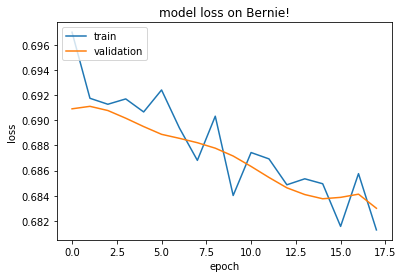

In [165]:
plot(era_models[100][1])

In [163]:
def GetEraModel(train_x, val_x, train_y, val_y ):

    model = Sequential([
        Dense(32, input_shape=(50,)),
        Activation('relu'),
        Dropout(0.3),
        Dense(100),
        Activation('relu'),
        Dense(100),
        Activation('relu'),
        Dropout(0.3),
        Dense(1),
        Activation('sigmoid'),
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_crossentropy'])

    history = model.fit(train_x, 
                        train_y, 
                        validation_data=(val_x,val_y), 
                        epochs=20, 
                        batch_size=1000, 
                        shuffle=True)
    
    return (model, history)



In [173]:
#era_models[119]
# now do a bunch of predictions

XV = data.x[ data.region=='validation' ]
YV = data.y[3][data.region=='validation']

# which era model to use per sample
M = np.argmax( model_dense.predict( data.x[ data.region=='validation' ] ), axis=1 )


In [190]:
era_models[0][0].predict( XV[0:1] ) 

array([[0.5059825]], dtype=float32)

In [218]:
import scipy as sp
def logloss(act, pred):  
    """ Vectorised computation of logloss """  

    #cap in official Kaggle implementation,   
    #per forums/t/1576/r-code-for-logloss  
    epsilon = 1e-15  
    pred = sp.maximum(epsilon, pred)  
    pred = sp.minimum(1-epsilon, pred)  

    #compute logloss function (vectorised)  
    ll = sum(   act*sp.log(pred) +   
                sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))  
    ll = ll * -1.0/len(act)  
    return ll

In [ ]:
losses = range(XV.shape[0]) \
    | select( lambda i: (XV[i],YV[i],M[i],i) ) \
    | select( lambda xym: logloss( [xym[1]], era_models[xym[3]][0].predict( np.expand_dims(xym[0], axis=0) )[0] ) ) \
    | take(100) \
    | as_list

In [ ]:
mean(losses)